<a href="https://colab.research.google.com/github/rushikeshnaik779/EDA/blob/master/Simple_EDA__Rooftop_Drinking_Water_Tank_Inspection_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Steps to perform EDA                     - by srikanth


1. Univariate Data Analysis :
   -  numercial - check Distribution, plot : boxplot and Histogram, find missing values.
   - categorical - Check freq_distribution and plot : bar chart and pie chart.
   - dates - feature extraction i.e. [hr, day, (week, month[plot:line graph]) &  qtr plot : hist]
   - Find missing values 
   - outliers 
   constant values = only one values i.e dataset will be of 99% with one value but with due to some error 1 % will be another data

2. Multivariate Analysis :
   - numerical vs numerical : plot = scatter plot  
   - categorical vs categorical : plot =  cluster plot or bar chart
   - numerical vs categorical and categorical vs numerical: plot = x-axis [box plot]

3. Sometimes you may need to convert numerical data to categorical data i.e ( in this we will create bins and freq of the data will contain the bin value and will plot as histogram) 


4. Relationships and distributions 
    - if two numericals are present then use corr() or scatterplot 
    - if two categoricals are present the ues association - chi square test 

- distributions 
-  outliers 

- check for type 1 error 
- check for type 2 error


(to read about supply & demand concept), 
( out of control factors )  

In [1]:
from google.colab import files 
uploaded = files.upload()
import io

Saving rooftop-drinking-water-tank-inspection-results-1.csv to rooftop-drinking-water-tank-inspection-results-1.csv


In [2]:
# importing libraries required for data manipulation and data visualization
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv(io.BytesIO(uploaded['rooftop-drinking-water-tank-inspection-results-1.csv']))


### Rooftop Drinking Water Tank Inspection Results
- NYC Health Code requires that building drinking water storage tanks be inspected annually and that the results of these inspections be reported to the Health Department (NYC DOHMH). To report specific inspection findings related to public safety and sanitary conditions, owners or their representatives fill out a questionnaire provided by DOHMH. This dataset is the non-administrative subset of owner-reported information. Reported data have not been verified by a City Agency

In [4]:
# glimpse of the data 
data.head()

,BIN,BOROUGH,ZIP,HOUSE_NUM,STREET_NAME,BLOCK,LOT,CONFIRMATION_NUM,REPORTING_YEAR,TANK_NUM,INSPECTION_BY_FIRM,INSPECTION_PERFORMED,INSPECTION_DATE,GI_REQ_INTERNAL_STRUCTURE,GI_RESULT_INTERNAL_STRUCTURE,GI_REQ_EXTERNAL_STRUCTURE,GI_RESULT_EXTERNAL_STRUCTURE,GI_REQ_OVERFLOW_PIPES,GI_RESULT_OVERFLOW_PIPES,GI_REQ_ACCESS_LADDERS,GI_RESULT_ACCESS_LADDERS,GI_REQ_AIR_VENTS,GI_RESULT_AIR_VENTS,GI_REQ_ROOF_ACCESS,GI_RESULT_ROOF_ACCESS,SI_REQ_SEDIMENT,SI_RESULT_SEDIMENT,SI_REQ_BIOLOGICAL_GROWTH,SI_RESULT_BIOLOGICAL_GROWTH,SI_REQ_DEBRIS_INSECTS,SI_RESULT_DEBRIS_INSECTS,SI_REQ_RODENT_BIRD,SI_RESULT_RODENT_BIRD,SAMPLE_COLLECTED,LAB_NAME,NYS_CERTIFIED,ANALYTES,COLIFORM,ECOLI,MEET_STANDARDS,LATITUDE,LONGITUDE,COMMUNITY_BOARD,COUNCIL_DISTRICT,CENSUS_TRACT,BBL,NTA,BATCH_DATE
0,1034025,MANHATTAN,10024,320,WEST 89 STREET,1250,47,WTI9835953296,2015,1,ISSEKS BROS INC,Y,12/10/2015,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,ENVIRONMENTAL BUILDING SOLUTIONS LLC,Y,B,A,A,NaN,40.791082,-73.977107,7.0,6.0,175.0,1.012500e+09,Upper West Side,05/11/2018 12:15:22 PM
1,1087485,MANHATTAN,10038,8,Spruce St.,100,7502,WTI5946705268,2015,2,Isseks Bros Inc,Y,06/24/2015,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,Environmental Building Solutions,Y,B,A,A,NaN,40.711407,-74.005573,1.0,1.0,1501.0,1.001008e+09,Battery Park City-Lower Manhattan,05/11/2018 12:15:29 PM
2,1082711,MANHATTAN,10011,455,WEST 23 STREET,721,7,WTI8886837394,2017,1,ISSEKS BROS INC,Y,11/02/2017,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,ENVIRONMENTAL BUILDING SOLUTIONS LLC,Y,B,A,A,NaN,40.747141,-74.002840,4.0,3.0,93.0,1.007210e+09,Hudson Yards-Chelsea-Flatiron-Union Square,05/11/2018 12:15:29 PM
3,1038647,MANHATTAN,10017,5,Tudor City Place,1333,23,WTI5707518714,2016,1,Isseks Bros. Inc.,Y,12/17/2016,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,Environmental Building Solutions LLC,Y,B,A,A,NaN,40.748054,-73.971185,6.0,4.0,88.0,1.013330e+09,Turtle Bay-East Midtown,05/11/2018 12:15:23 PM
4,1088817,MANHATTAN,10022,432,Park Ave,1292,7502,WTI0290447370,2017,1,New York Plumbing,Y,12/08/2017,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,Ambient Group,Y,B,A,A,NaN,40.761042,-73.971176,5.0,4.0,11202.0,1.012928e+09,Midtown-Midtown South,05/11/2018 12:15:27 PM


In [5]:
print('The rows and columns present in the dataset are ', data.shape)

The rows and columns present in the dataset are  (13484, 48)


### Data Description :

- BIN :Department of Buildings Building Identification Number
- BOROUGH : Borough of Water tank location
- ZIP : Zip of Water tank location
- HOUSE_NUM	: Number on street of water tank location
- STREET_NAME : street of water tank location
- BLOCK	: DOB block number of water tank location
- LOT : DOB lot number of water tank location
- CONFIRMATION_NUM : Provided by DOHMH upon certification
- REPORTING_YEAR : Reporting inspection year > 2000; < today
- TANK_NUM : Serial listing for multiple tanks ('first' tank = 1, etc.)
- INSPECTION_BY_FIRM = Name of professional inspecting firm
- INSPECTION_PERFORMED=Certifying inspection performed
- INSPECTION_DATE: date of inspection for results being reported
- GI_REQ_INTERNAL_STRUCTURE	: certifying inspection of tank internal structure
- GI_RESULT_INTERNAL_STRUCTURE : Certifying fitness of tank internal structure. N = No Unsanitary Conditions; A = Corrective Action Taken
- GI_REQ_EXTERNAL_STRUCTURE	: certifying inspection of tank external structure

- GI_RESULT_EXTERNAL_STRUCTURE	: Certifying fitness of tank external structure. N = No Unsanitary Conditions; A = Corrective Action Taken

- GI_REQ_OVERFLOW_PIPES	: certifying inspection of connected pipes

- GI_RESULT_OVERFLOW_PIPES	: Certifying fitness of connected pipes. N = No Unsanitary Conditions. A = Corrective Action Taken

- GI_REQ_ACCESS_LADDERS	: certifying inspection of access ladders

- GI_RESULT_ACCESS_LADDERS : Certifying fitness of access ladders. N = No Unsanitary Conditions; A = Corrective Action Taken

- GI_REQ_AIR_VENTS : certifying inspection of air vents

- GI_RESULT_AIR_VENTS : Certifying fitness of air vents. N = No Unsanitary Conditions; A = Corrective Action Taken

- GI_REQ_ROOF_ACCESS : Certifying inspection of roof access

- GI_RESULT_ROOF_ACCESS	: Certifying roof access. N = No Unsanitary Conditions; A = Corrective Action Taken

- SI_REQ_SEDIMENT:certifying inspection of tank for sediment

- SI_RESULT_SEDIMENT : Certifying condition of sediment. N = No Unsanitary Conditions; A = Corrective Action Taken

- SI_REQ_BIOLOGICAL_GROWTH	: Certifying inspection for biological growth

- SI_RESULT_BIOLOGICAL_GROWTH : Certifying condition of biological growth. N = No Unsanitary Conditions; A = Corrective Action Taken

- SI_REQ_DEBRIS_INSECTS	: certifying inspection for tank debris

- SI_RESULT_DEBRIS_INSECTS : Certifying condition re tank debris. N = No Unsanitary Conditions; A = Corrective Action Taken

- SI_REQ_RODENT_BIRD : certifying inspection of evidence of rodents or birds

- SI_RESULT_RODENT_BIRD	: Certifying condition for rodents or birds. N = No Unsanitary Conditions; A = Corrective Action Taken

- SAMPLE_COLLECTED : certifying water sample was collected

- LAB_NAME : Lab analyzing sample for this inspection

- NYS_CERTIFIED	: Confirming lab certifications

- ANALYTES : describing analysis performed. B = Bacterial; O=Other

- COLIFORM : Certifying lab analysis results for total coliform: A = Absent/None Detected; P = Present

- ECOLI	: Certifying lab analysis results for Ecoli: A = Absent/None Detected; P = Present

- MEET_STANDARDS : Certifying other analysis meets health standards.

- DELETED	
- LATITUDE	: Latitude of the water tank. Values calculated by DOHMH based on information provided in certification

- LONGITUDE	: Longitude of the water tank. Values calculated by DOHMH based on information provided in certification

- COMMUNITY_BOARD : The Community Board field indicates the New York City Community District where the water tank is located. Values calculated by DOHMH based on information provided in certification

- COUNCIL_DISTRICT	: The Council District field indicates the New York City Council District where the water tank is located. Values calculated by DOHMH based on information provided in certification

- CENSUS_TRACT : The Census Tract field indicates the U.S. Census Tract where the water tank is located. Values calculated by DOHMH based on information provided in certification

- BBL : The BBL (Borough, Block, and Lot) is a unique identifier for each tax lot in the City. Values calculated by DOHMH based on information provided in certification

- NTA : The Neighborhood Tabulation Area field indicates the New York City Neighborhood area where the water tank is located. Values calculated by DOHMH based on information provided in certification

- BATCH_DATE : Values calculated by DOHMH based on information provided in certification
Date & Time


In [6]:
# let's see the description of the dataset 
data.describe()

,BIN,ZIP,BLOCK,LOT,REPORTING_YEAR,TANK_NUM,LATITUDE,LONGITUDE,COMMUNITY_BOARD,COUNCIL_DISTRICT,CENSUS_TRACT,BBL
count,1.348400e+04,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13425.000000,13425.000000,13425.000000,13425.000000,13425.000000,1.342400e+04
mean,1.313438e+06,10156.861391,1400.702907,1308.553026,2016.011569,1.270320,40.756632,-73.969617,5.805661,6.894227,3292.247598,1.270498e+09
std,7.700247e+05,360.171788,1419.690313,2817.246492,0.837727,0.831573,0.040509,0.036316,2.856156,8.856212,11076.726650,7.290274e+08
min,1.000000e+06,10001.000000,0.000000,0.000000,2014.000000,1.000000,40.572169,-74.171260,1.000000,1.000000,1.000000,0.000000e+00
25%,1.019876e+06,10016.000000,828.000000,11.000000,2015.000000,1.000000,40.739606,-73.989108,5.000000,3.000000,80.000000,1.008430e+09
50%,1.041088e+06,10022.000000,1231.000000,32.000000,2016.000000,1.000000,40.756924,-73.977582,6.000000,4.000000,124.000000,1.012600e+09
75%,1.079908e+06,10038.000000,1471.000000,67.000000,2017.000000,1.000000,40.776022,-73.961966,8.000000,6.000000,194.000000,1.015083e+09
max,5.157402e+06,11694.000000,16177.000000,9078.000000,2018.000000,13.000000,40.908632,-73.713627,81.000000,49.000000,155101.000000,5.028298e+09


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13484 entries, 0 to 13483
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   BIN                           13484 non-null  int64  
 1   BOROUGH                       13484 non-null  object 
 2   ZIP                           13484 non-null  int64  
 3   HOUSE_NUM                     13484 non-null  object 
 4   STREET_NAME                   13484 non-null  object 
 5   BLOCK                         13484 non-null  int64  
 6   LOT                           13484 non-null  int64  
 7   CONFIRMATION_NUM              13484 non-null  object 
 8   REPORTING_YEAR                13484 non-null  int64  
 9   TANK_NUM                      13484 non-null  int64  
 10  INSPECTION_BY_FIRM            13482 non-null  object 
 11  INSPECTION_PERFORMED          13484 non-null  object 
 12  INSPECTION_DATE               13483 non-null  object 
 13  G

In [8]:
# let's check the frequency of dtypes 

data.dtypes.value_counts()

object     36
float64     6
int64       6
dtype: int64

- here we can see the 12 numerical columns and 36 categorical/text columns are present 


### Let's explore the dataset

In [9]:
# let's check if the null values are present ? 
print(data.isnull().sum(), '\n\n')
print('So it is visible that null values are present. with exploring every \
variable we will also deal with the null values')

BIN                                0
BOROUGH                            0
ZIP                                0
HOUSE_NUM                          0
STREET_NAME                        0
BLOCK                              0
LOT                                0
CONFIRMATION_NUM                   0
REPORTING_YEAR                     0
TANK_NUM                           0
INSPECTION_BY_FIRM                 2
INSPECTION_PERFORMED               0
INSPECTION_DATE                    1
GI_REQ_INTERNAL_STRUCTURE          0
GI_RESULT_INTERNAL_STRUCTURE       3
GI_REQ_EXTERNAL_STRUCTURE          0
GI_RESULT_EXTERNAL_STRUCTURE       3
GI_REQ_OVERFLOW_PIPES              0
GI_RESULT_OVERFLOW_PIPES           5
GI_REQ_ACCESS_LADDERS              0
GI_RESULT_ACCESS_LADDERS           6
GI_REQ_AIR_VENTS                   0
GI_RESULT_AIR_VENTS                5
GI_REQ_ROOF_ACCESS                 0
GI_RESULT_ROOF_ACCESS             12
SI_REQ_SEDIMENT                    0
SI_RESULT_SEDIMENT                 3
S

#### UNIVARIATE ANALYSIS OF CATEGORICAL VARIABLES 

In [10]:
#BOROUGH : Borough of Water tank location
data['BOROUGH'].value_counts()

MANHATTAN        11722
BROOKLYN           704
BRONX              570
QUEENS             478
STATEN ISLAND       10
Name: BOROUGH, dtype: int64

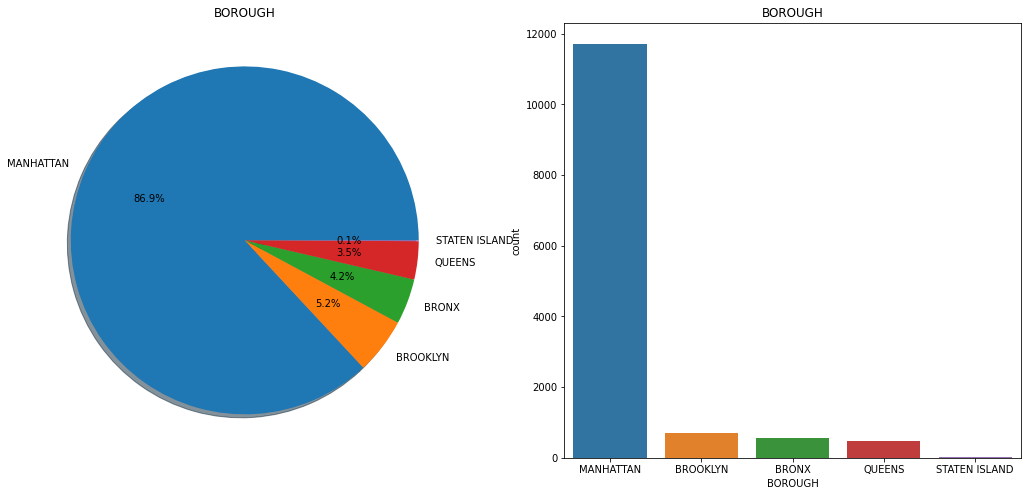

In [11]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['BOROUGH'].value_counts().plot.pie( autopct = '%1.1f%%',
                                         ax=ax[0], shadow=True)
ax[0].set_title('BOROUGH')
ax[0].set_ylabel('')
sns.countplot('BOROUGH', data=data, ax=ax[1])
ax[1].set_title('BOROUGH')
plt.show()

- The Manhattan is dominating with 86.7% for presence
- while STATEN ISLAND is only of 0.1% 

In [12]:
# exploring : 

print(data.INSPECTION_BY_FIRM.value_counts())
print("\n\nFrom the value_counts we can see the because of typos there are repeation of the firms now have to change it to the single name")

Rosenwach Tank Co. LLC                                                   5880
ISSEKS BROS INC                                                          2115
Isseks Bros. Inc.                                                        1183
Isseks Bros Inc                                                           710
AMERICAN PIPE & TANK                                                      484
                                                                         ... 
ISSEKS BROS.                                                                1
American Pipe and Tank Lining Cpmany                                        1
American Pipe and tank                                                      1
New York State Dept Of Health Environment Laboratory Approval Program       1
american Pipe & Tank                                                        1
Name: INSPECTION_BY_FIRM, Length: 428, dtype: int64


From the value_counts we can see the because of typos there are repeation of the firms n

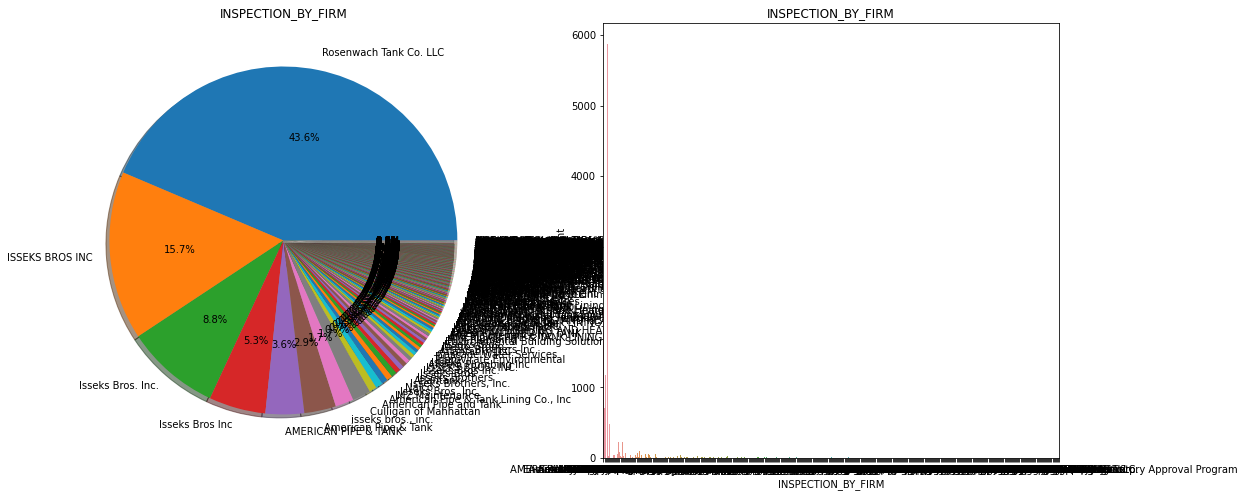

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['INSPECTION_BY_FIRM'].value_counts().plot.pie( autopct = '%1.1f%%',
                                         ax=ax[0], shadow=True)
ax[0].set_title('INSPECTION_BY_FIRM')
ax[0].set_ylabel('')
sns.countplot('INSPECTION_BY_FIRM', data=data, ax=ax[1])
ax[1].set_title('INSPECTION_BY_FIRM')
plt.show()

In [14]:
data['INSPECTION_BY_FIRM1'] = data['INSPECTION_BY_FIRM']
data.loc[:,'INSPECTION_BY_FIRM1'] = 'others'
data.loc[data['INSPECTION_BY_FIRM'].str.upper().str.contains('ROSENWACH')==True, 'INSPECTION_BY_FIRM1'] = "ROSENWACH TANK CO LLC"

data.loc[data['INSPECTION_BY_FIRM'].str.upper().str.contains('ISSEKS')==True, 'INSPECTION_BY_FIRM1'] = "ISSEKS BROS INC"
data.loc[data['INSPECTION_BY_FIRM'].str.upper().str.contains('AMERICAN PIPE')==True, 'INSPECTION_BY_FIRM1'] = "AMERICAN PIPE & TANK"
data.loc[data['INSPECTION_BY_FIRM'].str.upper().str.contains('AMERICAN PIEP')==True, 'INSPECTION_BY_FIRM1'] = "AMERICAN PIPE & TANK"
data.loc[data['INSPECTION_BY_FIRM'].str.upper().str.contains('AMERICA PIPE')==True, 'INSPECTION_BY_FIRM1'] = "AMERICAN PIPE & TANK"
data.loc[data['INSPECTION_BY_FIRM'].str.upper().str.contains('CULLIGAN')==True, 'INSPECTION_BY_FIRM1'] = "CULLIGAN OF MANHATTAN"
data.loc[data['INSPECTION_BY_FIRM'].str.upper().str.contains('CULLIGAN')==True, 'INSPECTION_BY_FIRM1'] = "CULLIGAN OF MANHATTAN"


Count for the others is : 1240 which is so less compared with 13k results


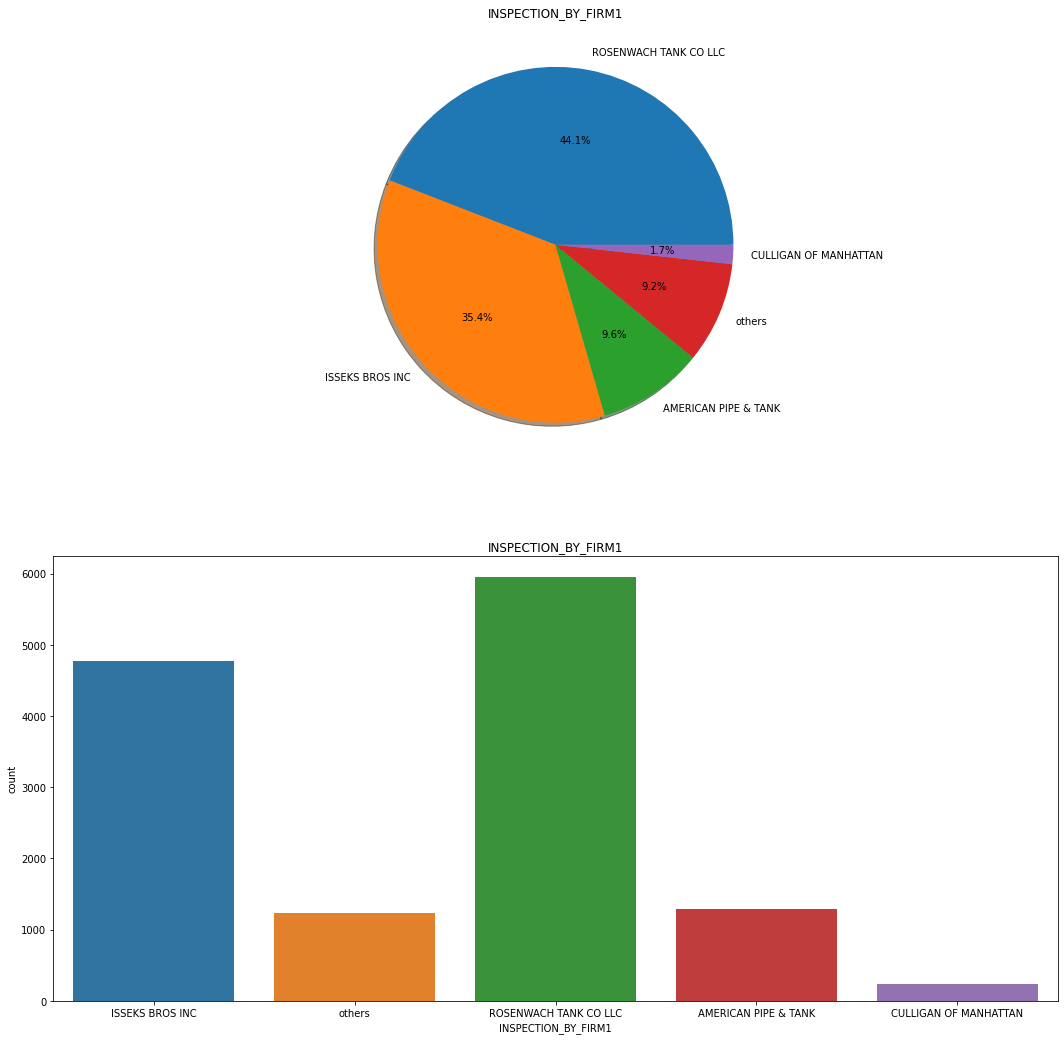

In [15]:
f, ax = plt.subplots(2, 1, figsize=(18, 18))
print('Count for the others is :',data[data['INSPECTION_BY_FIRM1']=='others']['INSPECTION_BY_FIRM1'].count(), 'which is so less compared with 13k results')
data['INSPECTION_BY_FIRM1'].value_counts().plot.pie( autopct = '%1.1f%%',
                                         ax=ax[0], shadow=True)
ax[0].set_title('INSPECTION_BY_FIRM1')
ax[0].set_ylabel('')
sns.countplot('INSPECTION_BY_FIRM1', data=data, ax=ax[1])
ax[1].set_title('INSPECTION_BY_FIRM1')
plt.show()

So after cleaning data and converting uppercases with correcting the typos we get above pie chart which looks quite clean now 
- Testing with ROSENWACH tank is in huge amount.
- Only 9.2% of tanks are others 

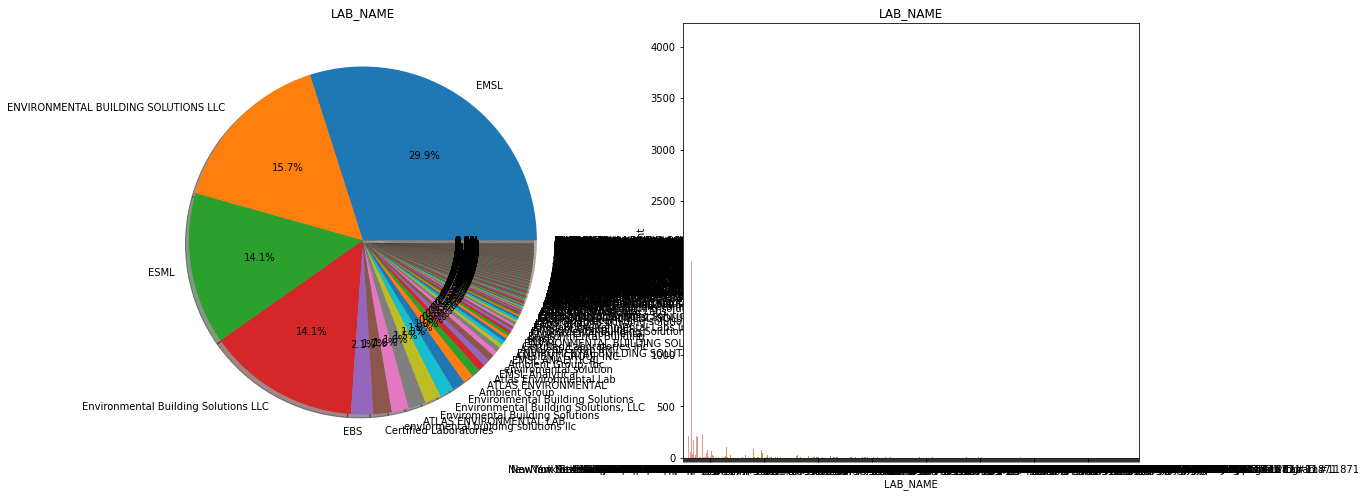

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['LAB_NAME'].value_counts().plot.pie( autopct = '%1.1f%%',
                                         ax=ax[0], shadow=True)
ax[0].set_title('LAB_NAME')
ax[0].set_ylabel('')
sns.countplot('LAB_NAME', data=data, ax=ax[1])
ax[1].set_title('LAB_NAME')
plt.show()

In [17]:
# these many are the ENviromental BUildings SOlution has typos in it so because of they are getting as different categories 
print(data[data['LAB_NAME'].str.upper().str.contains('ENVIROMENTAL BUILDING', na=False)]['LAB_NAME'].unique())
# And also EMSL has typos we need to correct them and then need to create graphs to understand 
print(data[data['LAB_NAME'].str.upper().str.contains('EMSL', na=False)]['LAB_NAME'].unique())
print(data[data['LAB_NAME'].str.upper().str.contains('ESML', na=False)]['LAB_NAME'].unique())


['Enviromental Building Solutions' 'Enviromental Building solutions'
 'ENVIROMENTAL BUILDING SOLUTIONS' 'Enviromental Building Soluton'
 'Enviromental Building Solution' 'Enviromental Building Solutions, LLC'
 'enviromental building solutions LLC'
 'ENVIROMENTAL BUILDING SOLUTIONS LLC' 'Enviromental building solutio'
 'Enviromental Building Solution LLC' 'eNVIROMENTAL BUILDING SOLUTIONS'
 'Enviromental building solutions' 'enviromental building solution'
 'Enviromental Building' 'Enviromental Building Solutions LLC'
 'enviromental building solutions' 'enviromental Building Solutions'
 'ENVIROMENTAL BUILDING SOLTUIONS LLC'
 'ENVIROMENTAL BUILDING SOULUTIONS LLC' 'ENVIROMENTAL BUILDING SOLUTION'
 'ENVIromental Building Solutions' 'Enviromental building Solutions'
 'Enviromental Building Soluitions' 'ENviromental Building Solutions'
 'ENVIROMENTAL Building Solutions' 'Enviromental Building Solutions,LLC'
 'Enviromental building solutions, LLC.' 'Enviromental building solution'
 'ENVIROMEN

In [18]:
# let's change them to only one name as 'EMSL Analytical, Inc.'
data['LAB_NAME1'] = data['LAB_NAME']
data.loc[:,'LAB_NAME1'] = 'others'
data.loc[data['LAB_NAME'].str.upper().str.contains('ENVIROMENTAL BUILDING')==True,
         'LAB_NAME1'] = "Environmental Building Solutions, LLC"
data.loc[data['LAB_NAME'].str.upper().str.contains('ENVIROMENTAL BUILDINGS')==True,
         'LAB_NAME1'] = "Environmental Building Solutions, LLC"
data.loc[data['LAB_NAME'].str.upper().str.contains('ENVIROMENTAL BUILDING SOLUTIONS')==True,
         'LAB_NAME1'] = "Environmental Building Solutions, LLC"
data.loc[data['LAB_NAME'].str.upper().str.contains('ENVIRONMENTAL BUILDING')==True,
         'LAB_NAME1'] = "Environmental Building Solutions, LLC"
data.loc[data['LAB_NAME'].str.upper().str.contains('EBS')==True,
         'LAB_NAME1'] = "Environmental Building Solutions, LLC"
data.loc[data['LAB_NAME'].str.upper().str.contains('CERTIFIED LABORATORIES')==True,
         'LAB_NAME1'] = "CERTIFIED LABORATORIES"
data.loc[data['LAB_NAME'].str.upper().str.contains('ATLAS')==True,
         'LAB_NAME1'] = "ATLAS Env LABORATORIES"

data.loc[data['LAB_NAME'].str.upper().str.contains('EMSL')==True, 'LAB_NAME1'] = "EMSL Analytical, Inc."
data.loc[data['LAB_NAME'].str.upper().str.contains('ESML')==True, 'LAB_NAME1'] = "EMSL Analytical, Inc."



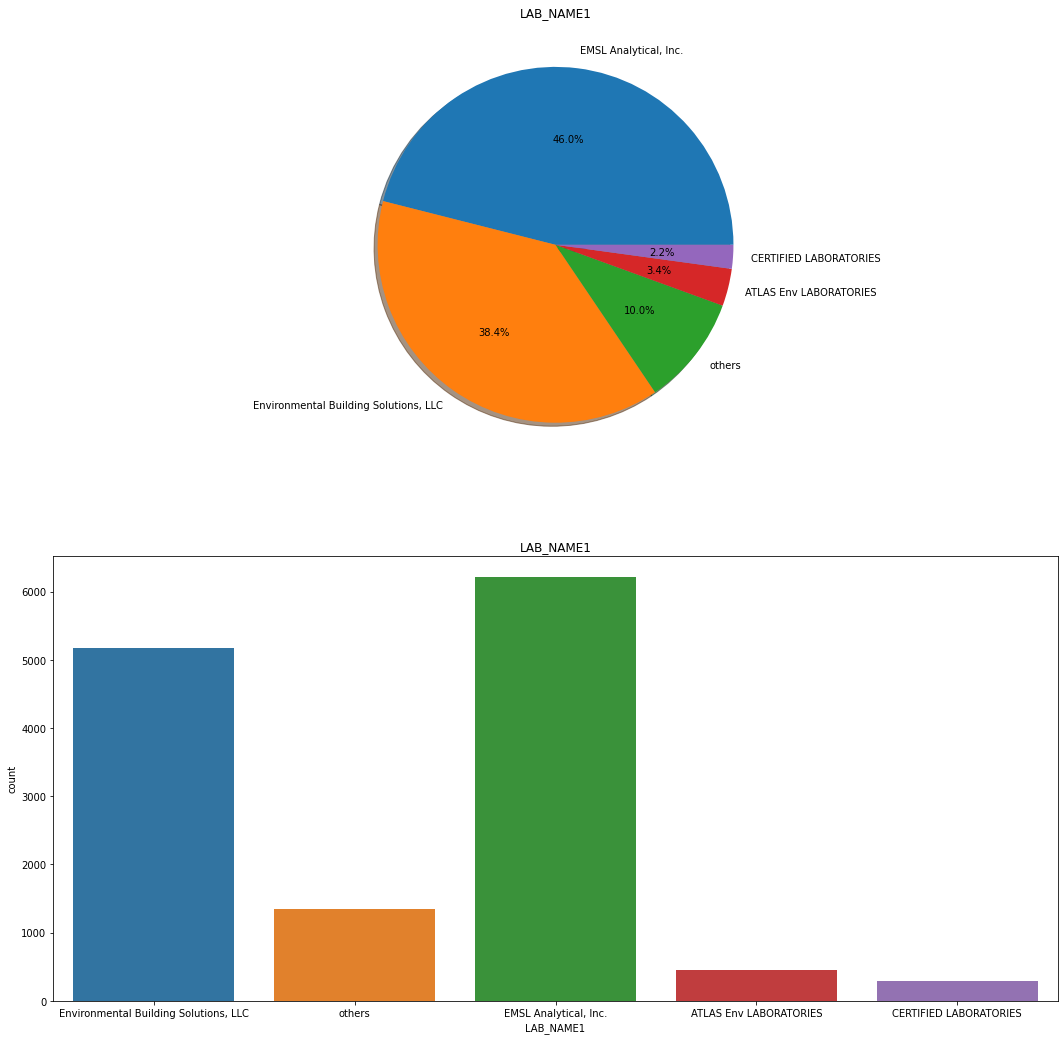

In [19]:
f, ax = plt.subplots(2,1, figsize=(18, 18))
data['LAB_NAME1'].value_counts().plot.pie( autopct = '%1.1f%%',
                                         ax=ax[0], shadow=True)
ax[0].set_title('LAB_NAME1')
ax[0].set_ylabel('')
sns.countplot('LAB_NAME1', data=data, ax=ax[1])
ax[1].set_title('LAB_NAME1')
plt.show()

In [20]:
 # NTA : The Neighborhood Tabulation Area field indicates the New York City Neighborhood area where the water tank is located.
 # Values calculated by DOHMH based on information provided in certification

 d = data['NTA'].value_counts()[data['NTA'].value_counts().values>50]

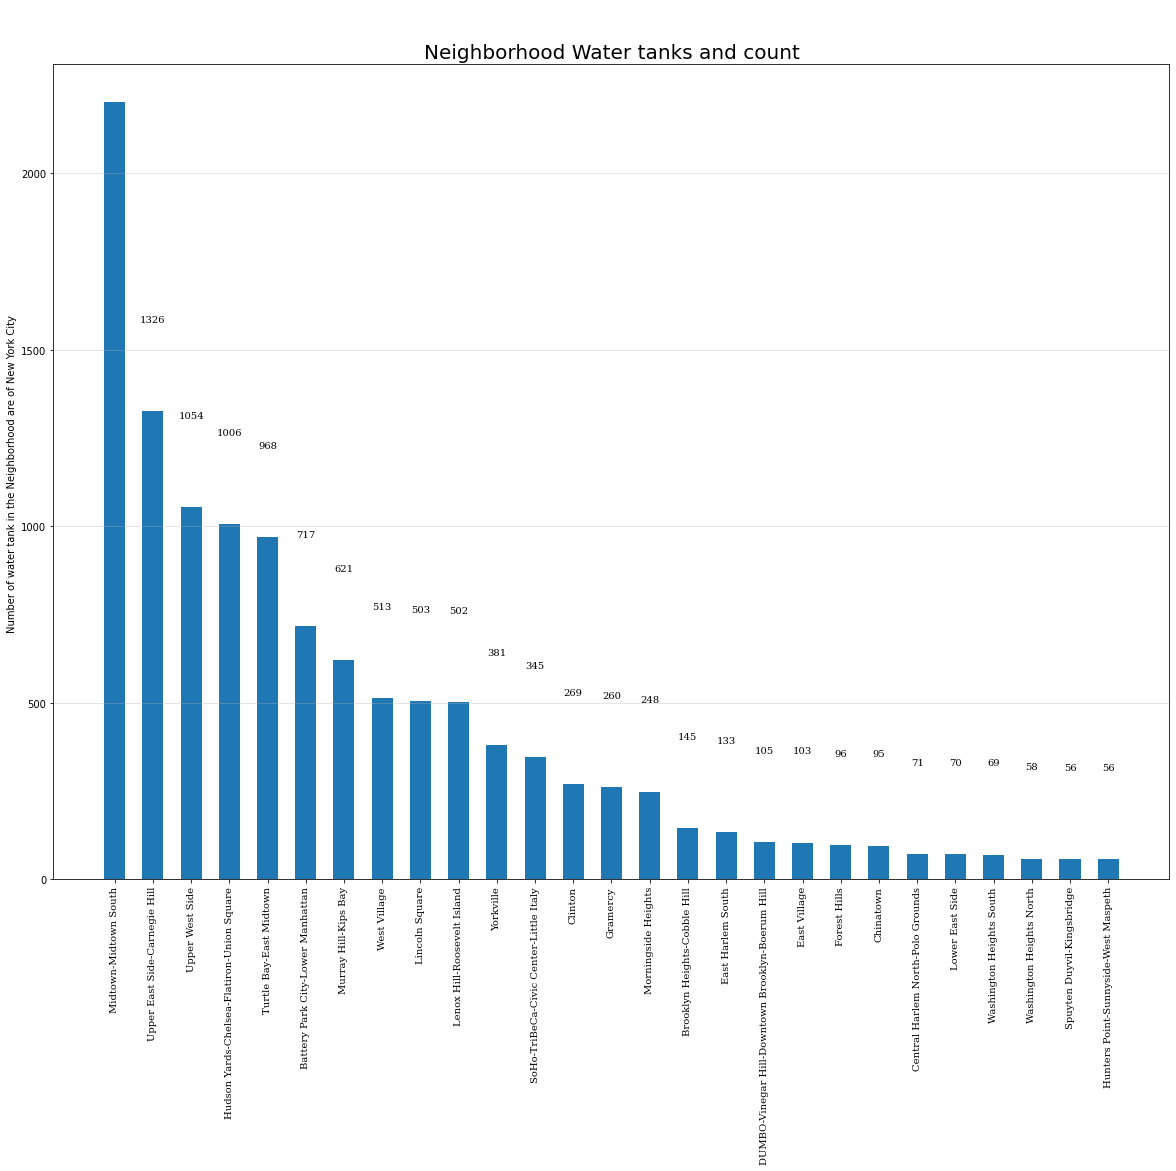

In [21]:
fig, ax = plt.subplots(1, 1,  figsize=(20, 15))

ax.bar(d.index, d.values, width=0.55, linewidth=0.7)

for i in d.index : 
  ax.annotate(f"{d[i]}", 
              xy=(i, d[i]+260), 
              va='center', 
              ha='center', 
              fontweight='light', 
              fontfamily='serif', )
ax.set_xticklabels(d.index, fontfamily='serif', rotation=90)
ax.set_ylabel('Number of water tank in the Neighborhood are of New York City ')
ax.set_title('Neighborhood Water tanks and count', size = 20)
ax.grid(axis='y', linestyle='-', alpha=0.4)
plt.show()

- from above fig you can see the freq distribution of the categorical variable 
- NTA : The Neighborhood Tabulation Area field indicates the New York City Neighborhood area where the water tank is located. Values calculated by DOHMH based on information provided in certification 





In [22]:
print("Lets see how many inspection done")

Lets see how many inspection done


COunts of Inspection performed and not performed are
 Y    13481
N        3
Name: INSPECTION_PERFORMED, dtype: int64


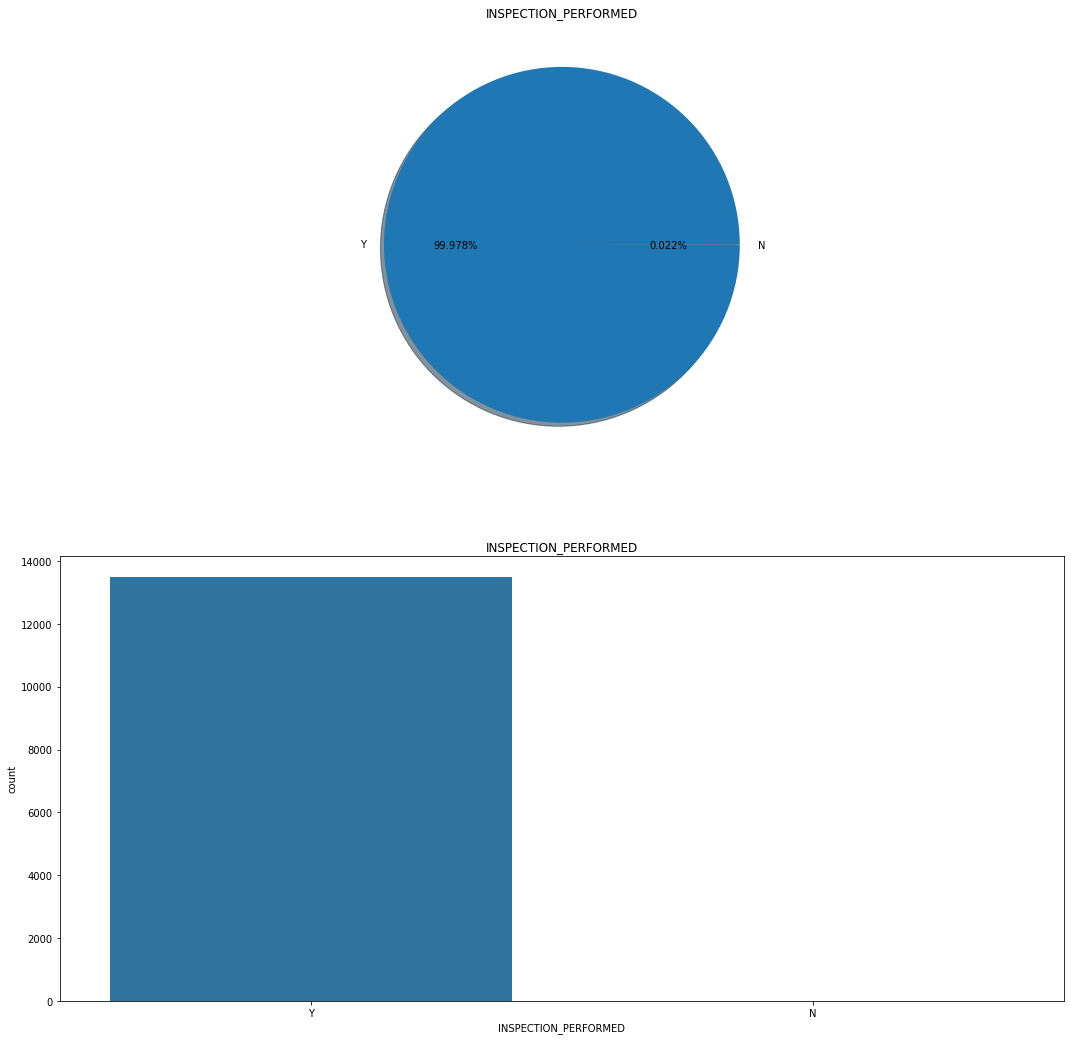

In [23]:

print('COunts of Inspection performed and not performed are\n',data['INSPECTION_PERFORMED'].value_counts())
#you can see only 3 places are where INSPECTION IS NOT PERFORMED 
f, ax = plt.subplots(2,1, figsize=(18, 18))
data['INSPECTION_PERFORMED'].value_counts().plot.pie( autopct = '%1.3f%%',
                                         ax=ax[0], shadow=True)
ax[0].set_title('INSPECTION_PERFORMED')
ax[0].set_ylabel('')
sns.countplot('INSPECTION_PERFORMED', data=data, ax=ax[1])
ax[1].set_title('INSPECTION_PERFORMED')
plt.show()

Only 3 times inspection is not performed as curious I am to check which are those .. 
let's explore that

In [24]:
data[data['INSPECTION_PERFORMED']=='N']

,BIN,BOROUGH,ZIP,HOUSE_NUM,STREET_NAME,BLOCK,LOT,CONFIRMATION_NUM,REPORTING_YEAR,TANK_NUM,INSPECTION_BY_FIRM,INSPECTION_PERFORMED,INSPECTION_DATE,GI_REQ_INTERNAL_STRUCTURE,GI_RESULT_INTERNAL_STRUCTURE,GI_REQ_EXTERNAL_STRUCTURE,GI_RESULT_EXTERNAL_STRUCTURE,GI_REQ_OVERFLOW_PIPES,GI_RESULT_OVERFLOW_PIPES,GI_REQ_ACCESS_LADDERS,GI_RESULT_ACCESS_LADDERS,GI_REQ_AIR_VENTS,GI_RESULT_AIR_VENTS,GI_REQ_ROOF_ACCESS,GI_RESULT_ROOF_ACCESS,SI_REQ_SEDIMENT,SI_RESULT_SEDIMENT,SI_REQ_BIOLOGICAL_GROWTH,SI_RESULT_BIOLOGICAL_GROWTH,SI_REQ_DEBRIS_INSECTS,SI_RESULT_DEBRIS_INSECTS,SI_REQ_RODENT_BIRD,SI_RESULT_RODENT_BIRD,SAMPLE_COLLECTED,LAB_NAME,NYS_CERTIFIED,ANALYTES,COLIFORM,ECOLI,MEET_STANDARDS,LATITUDE,LONGITUDE,COMMUNITY_BOARD,COUNCIL_DISTRICT,CENSUS_TRACT,BBL,NTA,BATCH_DATE,INSPECTION_BY_FIRM1,LAB_NAME1
3474,1050335,MANHATTAN,10128,333,East 95th Street,1558,20,WTI7517225144,2014,1,United Wood Tank/JMZ Maintenance,N,04/20/2014,Y,NaN,Y,NaN,Y,NaN,Y,NaN,Y,NaN,Y,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,40.783200,-73.946681,8.0,5.0,15601.0,1.015580e+09,Yorkville,05/11/2018 12:15:25 PM,others,others
6293,1031135,MANHATTAN,10024,45,West 81st Street,1195,5,WTI5463421010,2015,1,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,40.782597,-73.973026,7.0,6.0,165.0,1.011950e+09,Upper West Side,05/11/2018 12:15:21 PM,others,others
7761,1078696,MANHATTAN,10128,422,East 89th Street,1568,37,WTI0832394821,2014,1,United Wood Tank,N,04/19/2014,Y,NaN,Y,NaN,Y,NaN,Y,NaN,Y,NaN,Y,NaN,N,NaN,N,NaN,N,NaN,N,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,40.778506,-73.947276,8.0,5.0,14402.0,1.015680e+09,Yorkville,05/11/2018 12:15:23 PM,others,others


- 3 of them are from manhattan and two have similar ZIP code with EAST STREET 

In [25]:
# 
cols = ["GI_REQ_INTERNAL_STRUCTURE",	"GI_RESULT_INTERNAL_STRUCTURE",	"GI_REQ_EXTERNAL_STRUCTURE",	"GI_RESULT_EXTERNAL_STRUCTURE",	"GI_REQ_OVERFLOW_PIPES",	"GI_RESULT_OVERFLOW_PIPES",	"GI_REQ_ACCESS_LADDERS", 	"GI_RESULT_ACCESS_LADDERS",	"GI_REQ_AIR_VENTS",	"GI_RESULT_AIR_VENTS",	"GI_REQ_ROOF_ACCESS", 	"GI_RESULT_ROOF_ACCESS", 	"SI_REQ_SEDIMENT",	"SI_RESULT_SEDIMENT",	"SI_REQ_BIOLOGICAL_GROWTH",	"SI_RESULT_BIOLOGICAL_GROWTH",	"SI_REQ_DEBRIS_INSECTS",	"SI_RESULT_DEBRIS_INSECTS",	"SI_REQ_RODENT_BIRD",	"SI_RESULT_RODENT_BIRD",	"SAMPLE_COLLECTED",	"NYS_CERTIFIED",	"ANALYTES",	"COLIFORM",	"ECOLI",	"MEET_STANDARDS"]

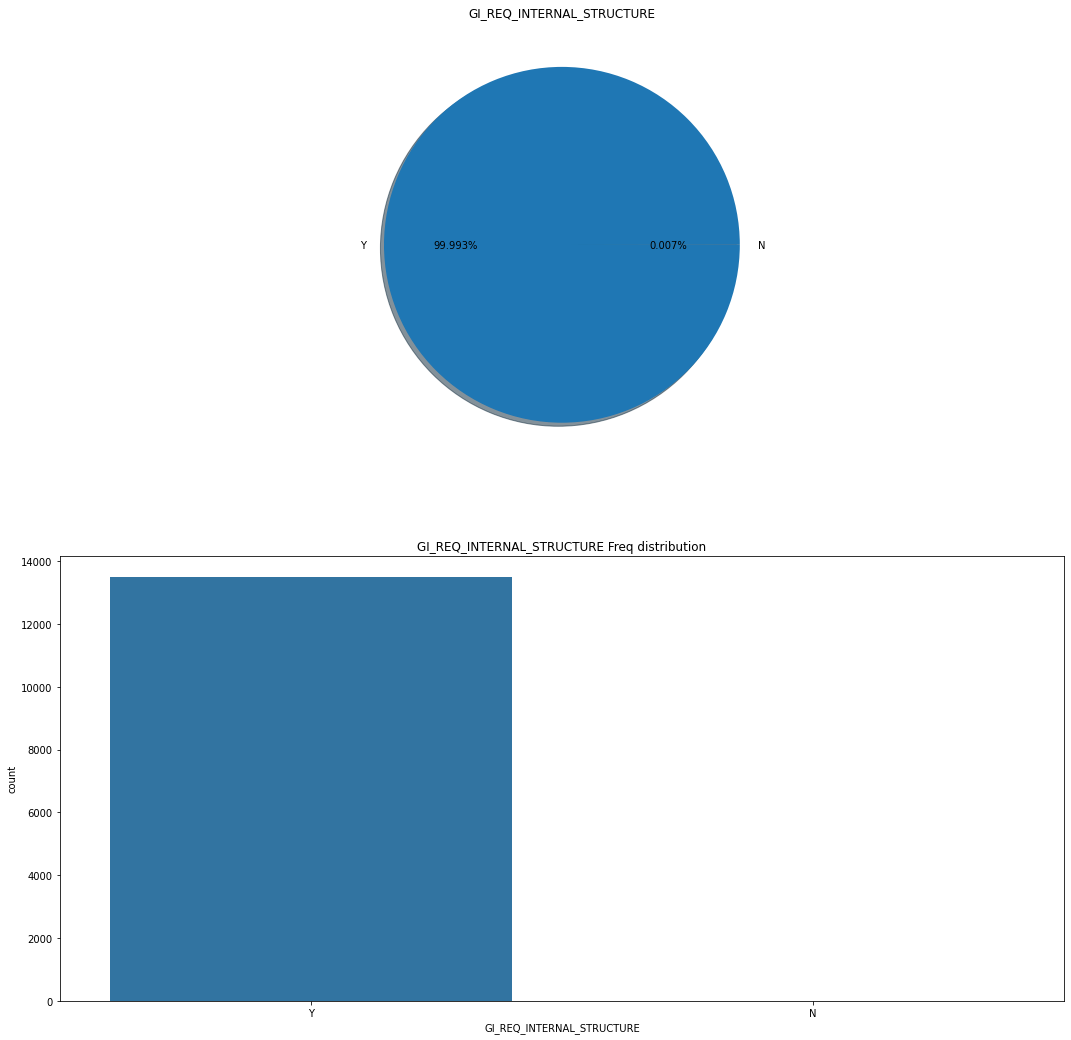

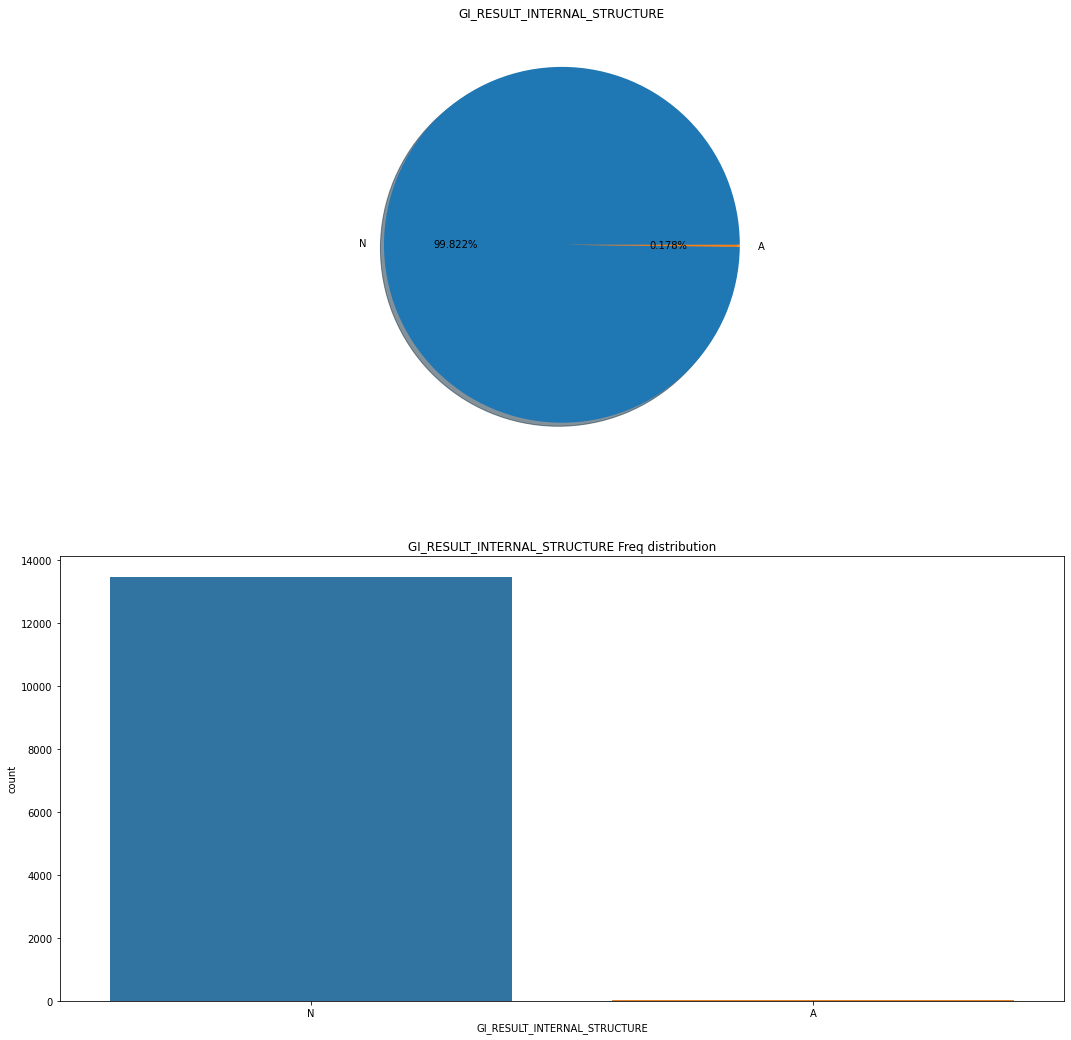

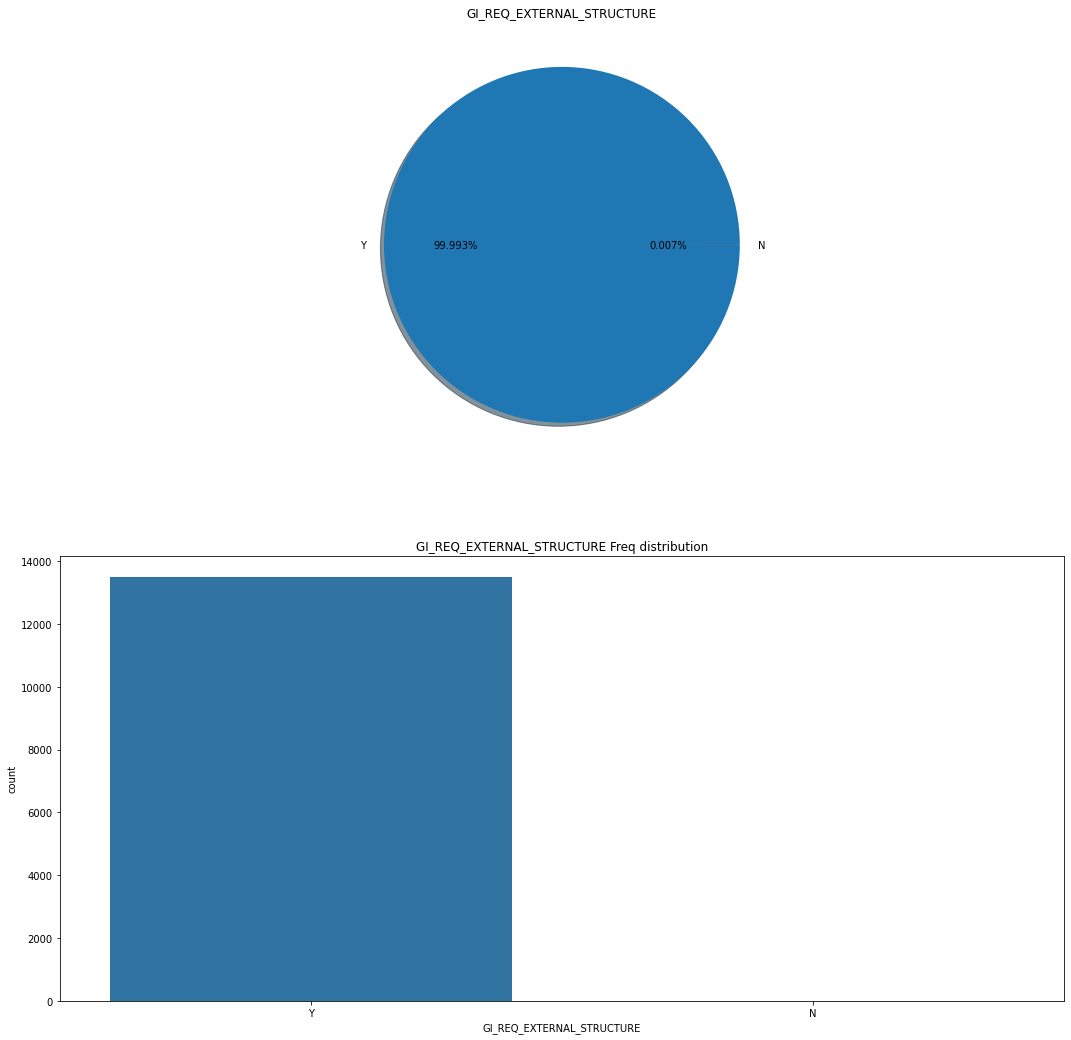

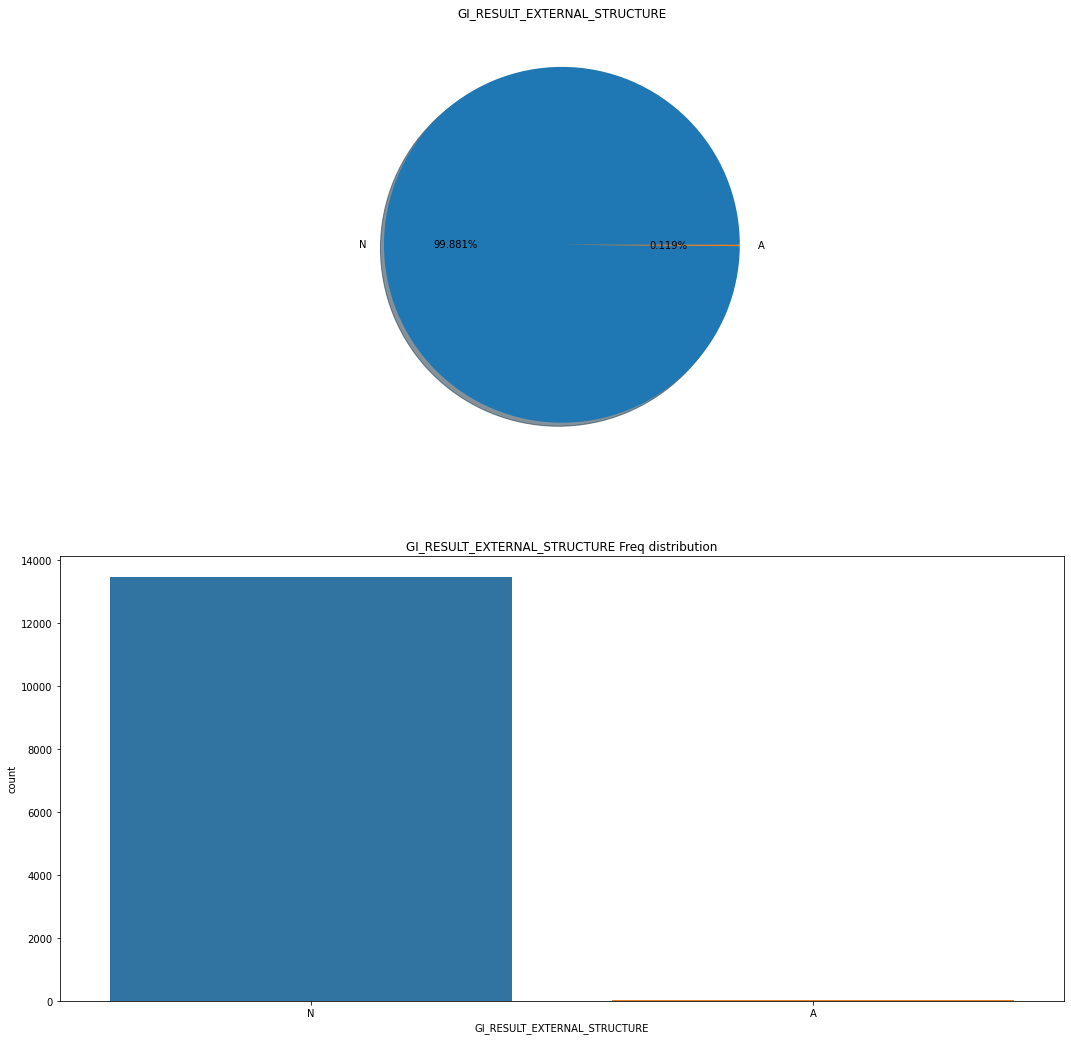

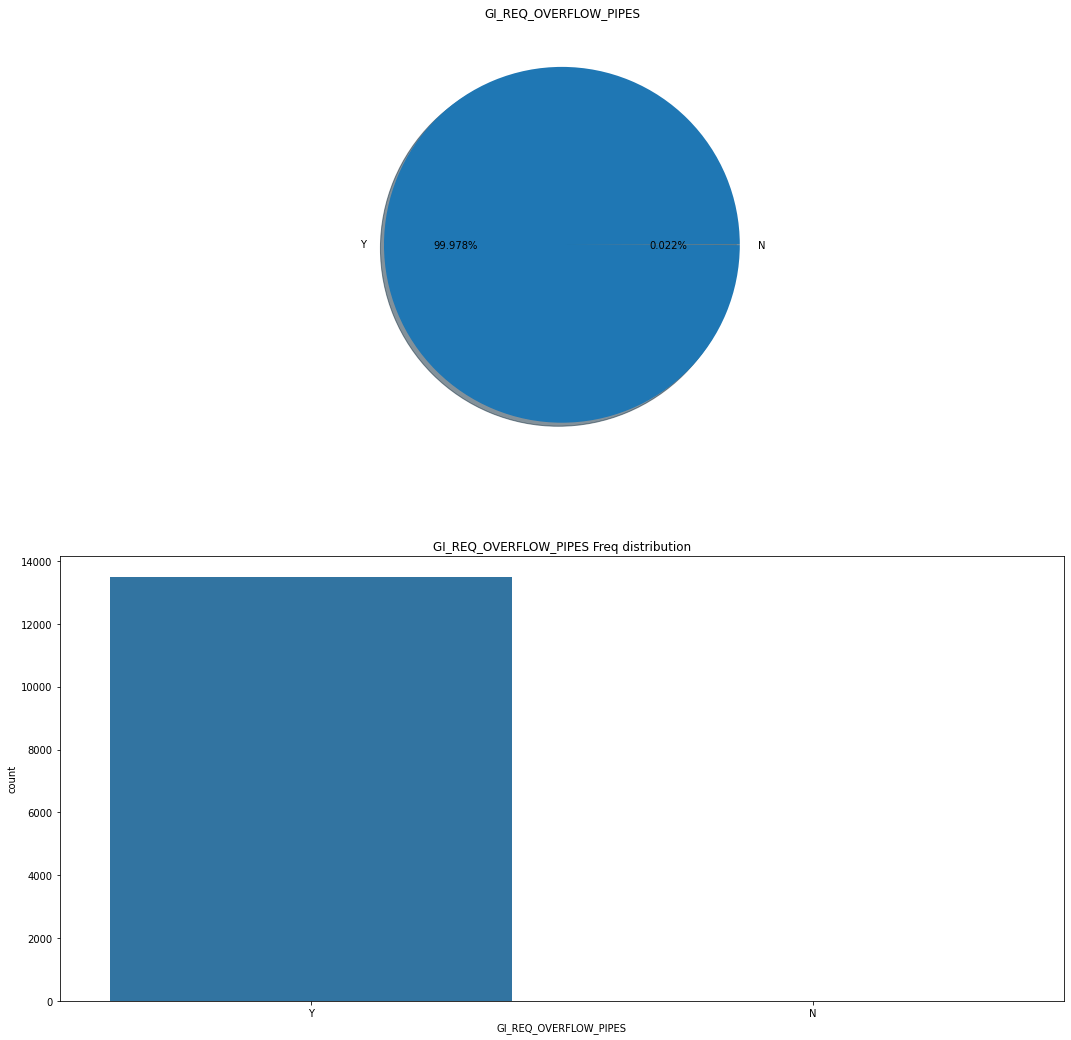

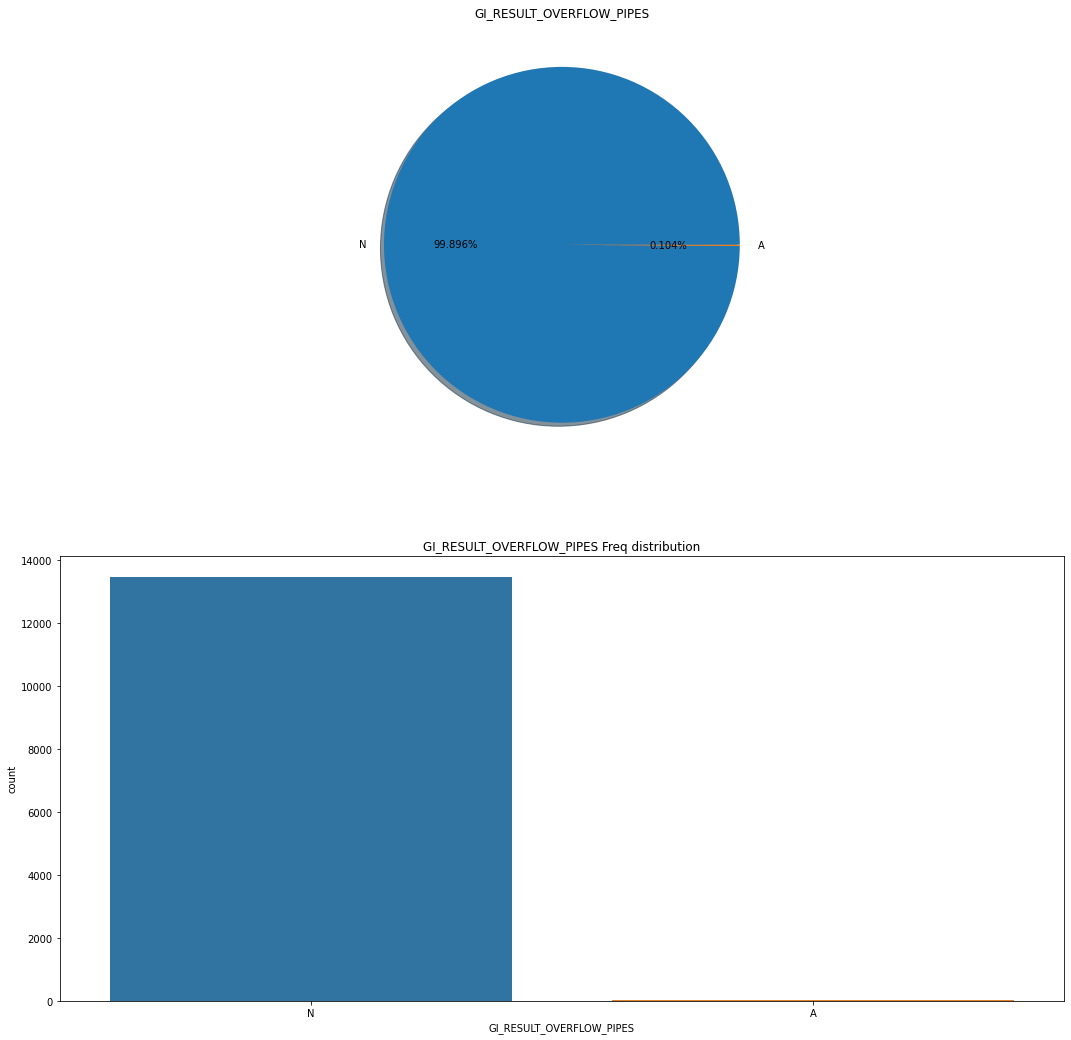

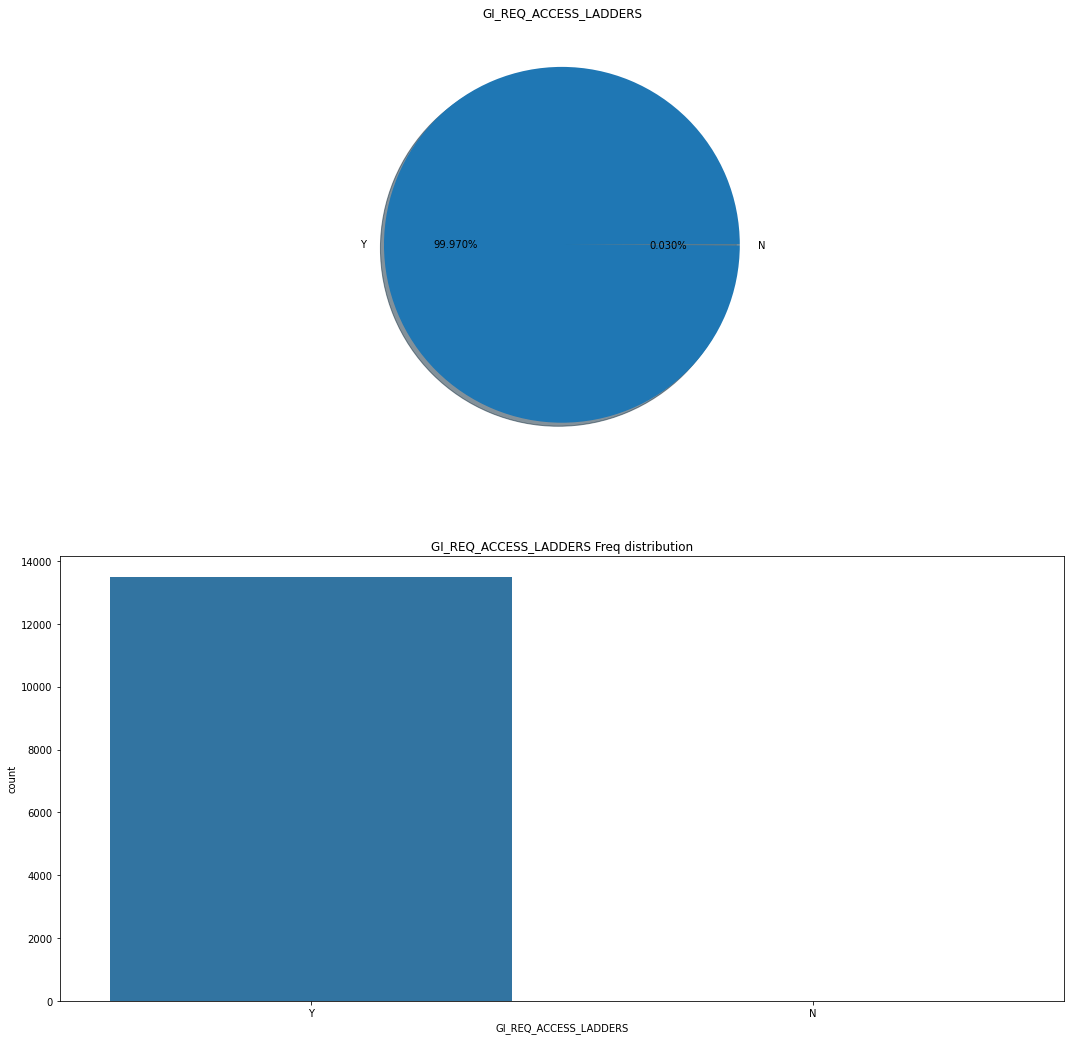

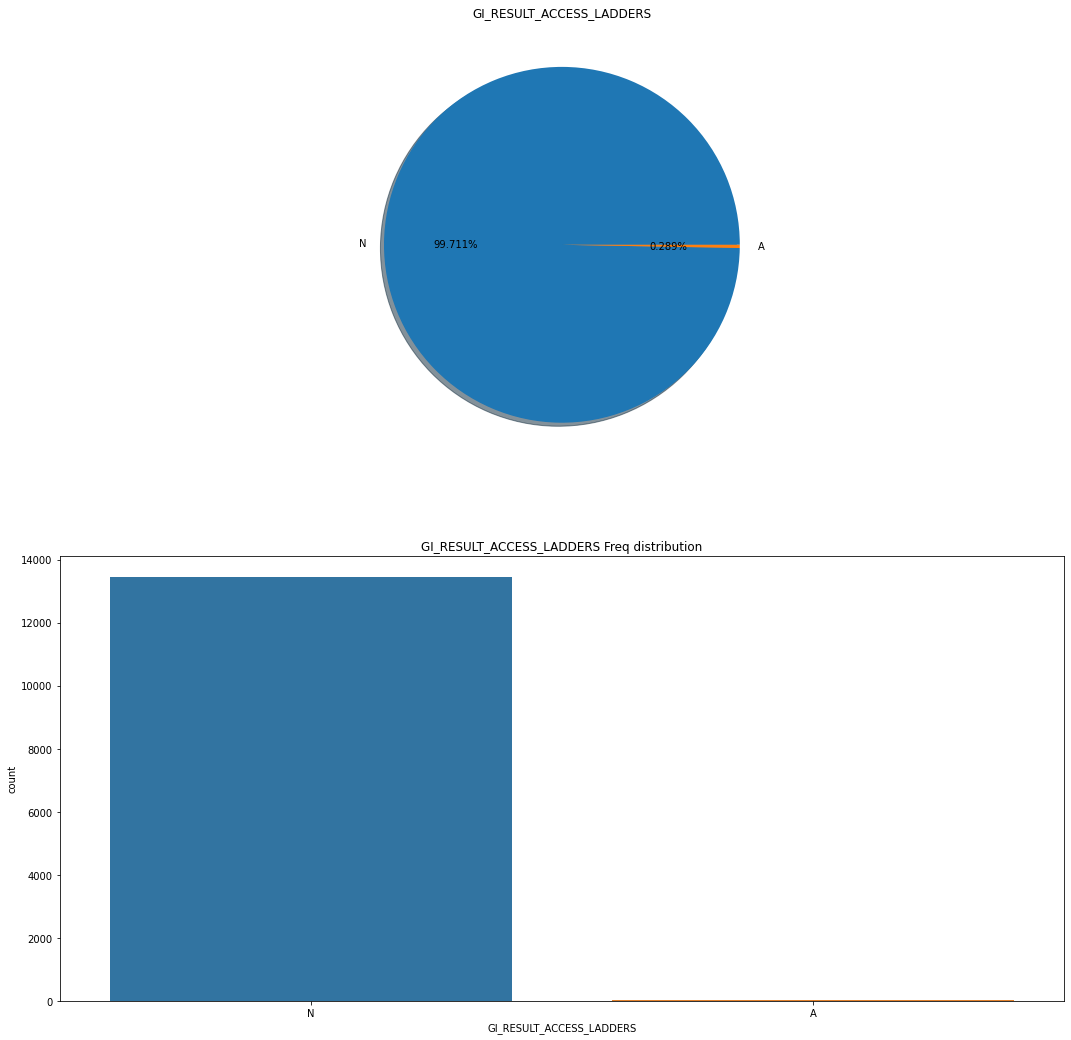

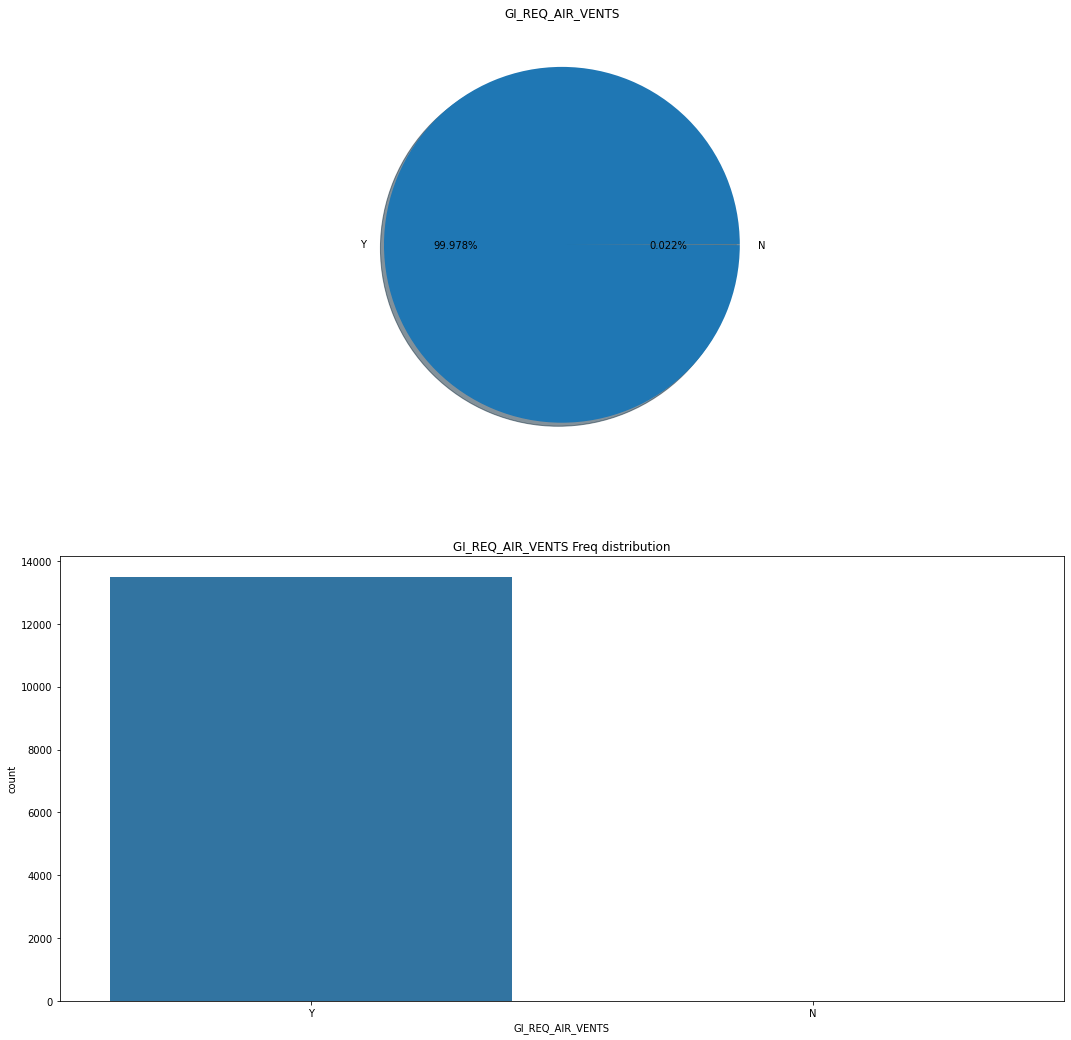

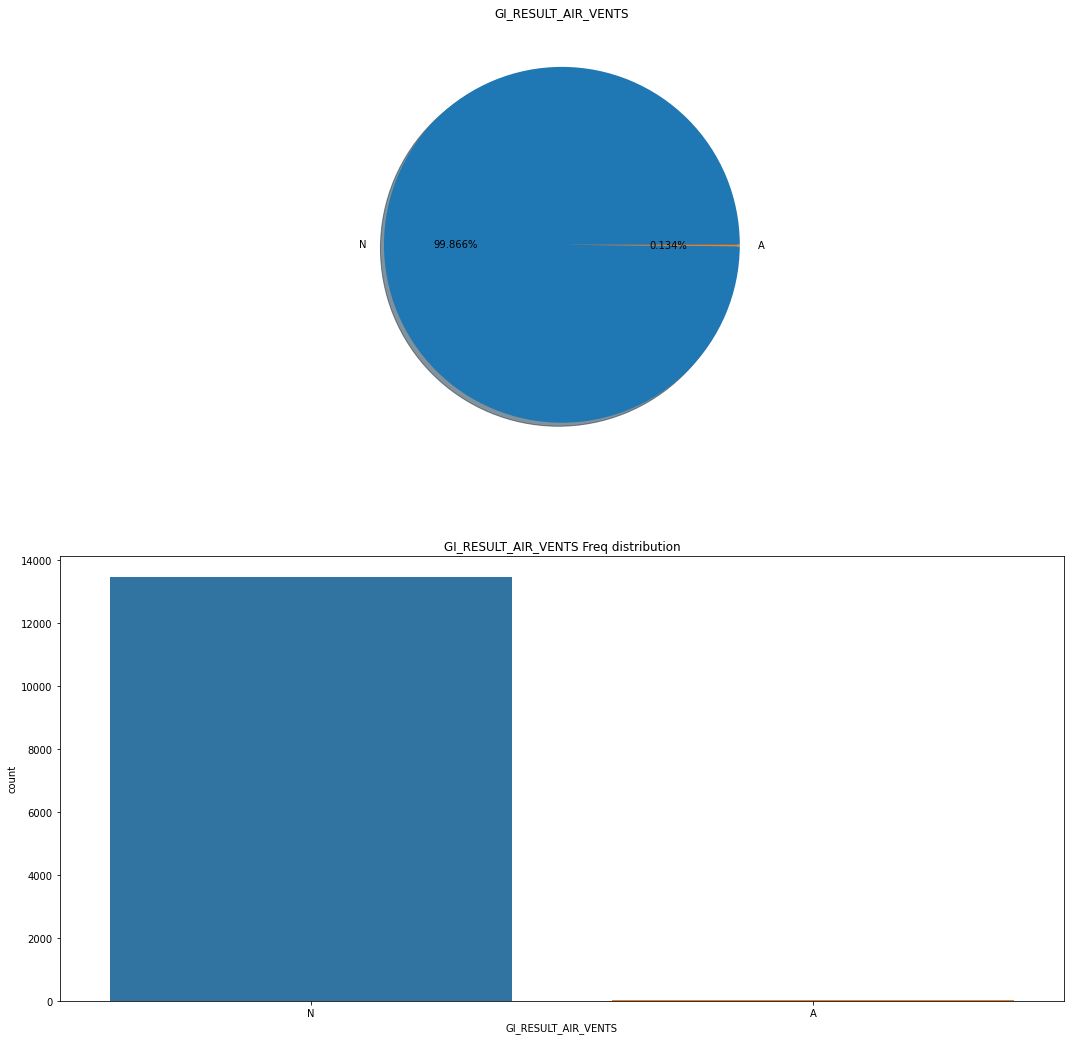

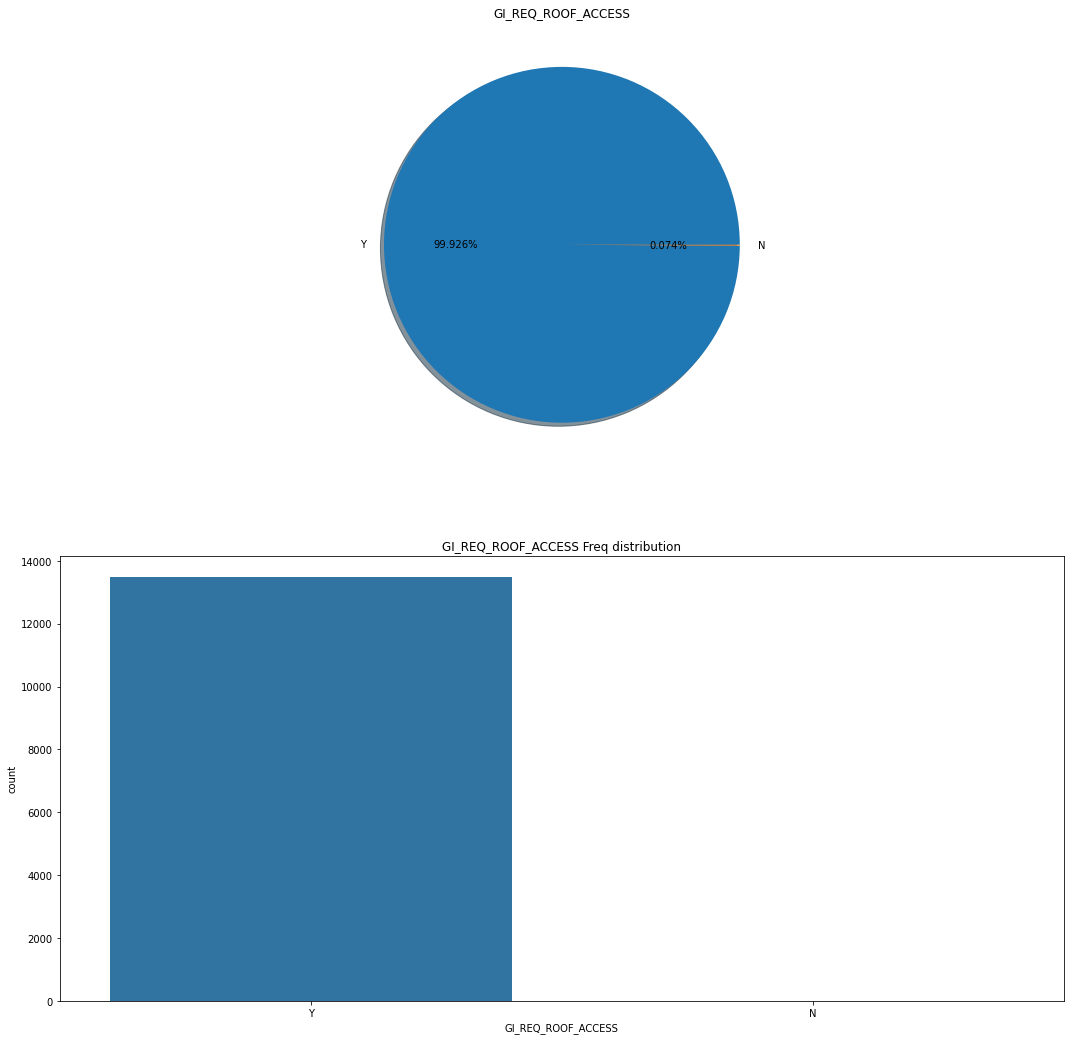

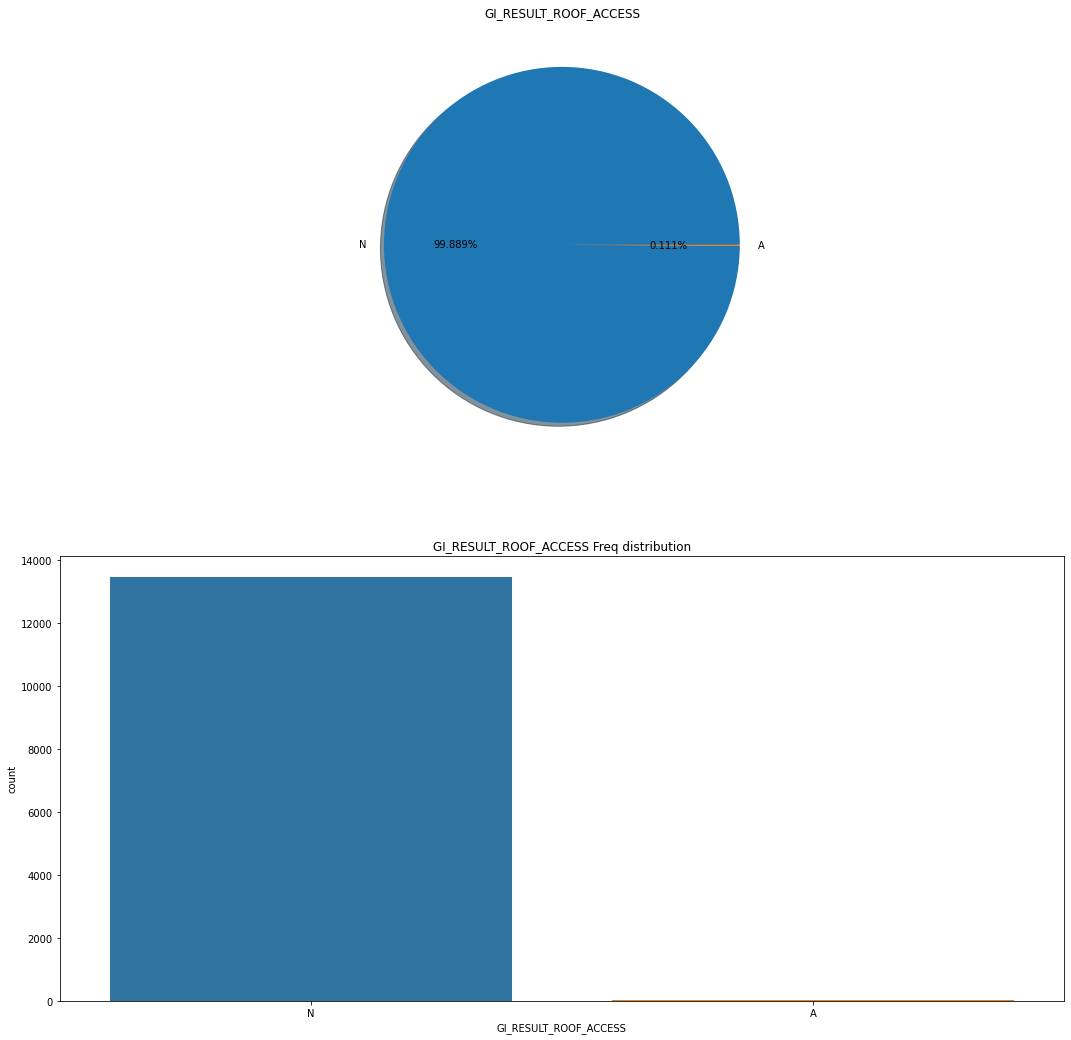

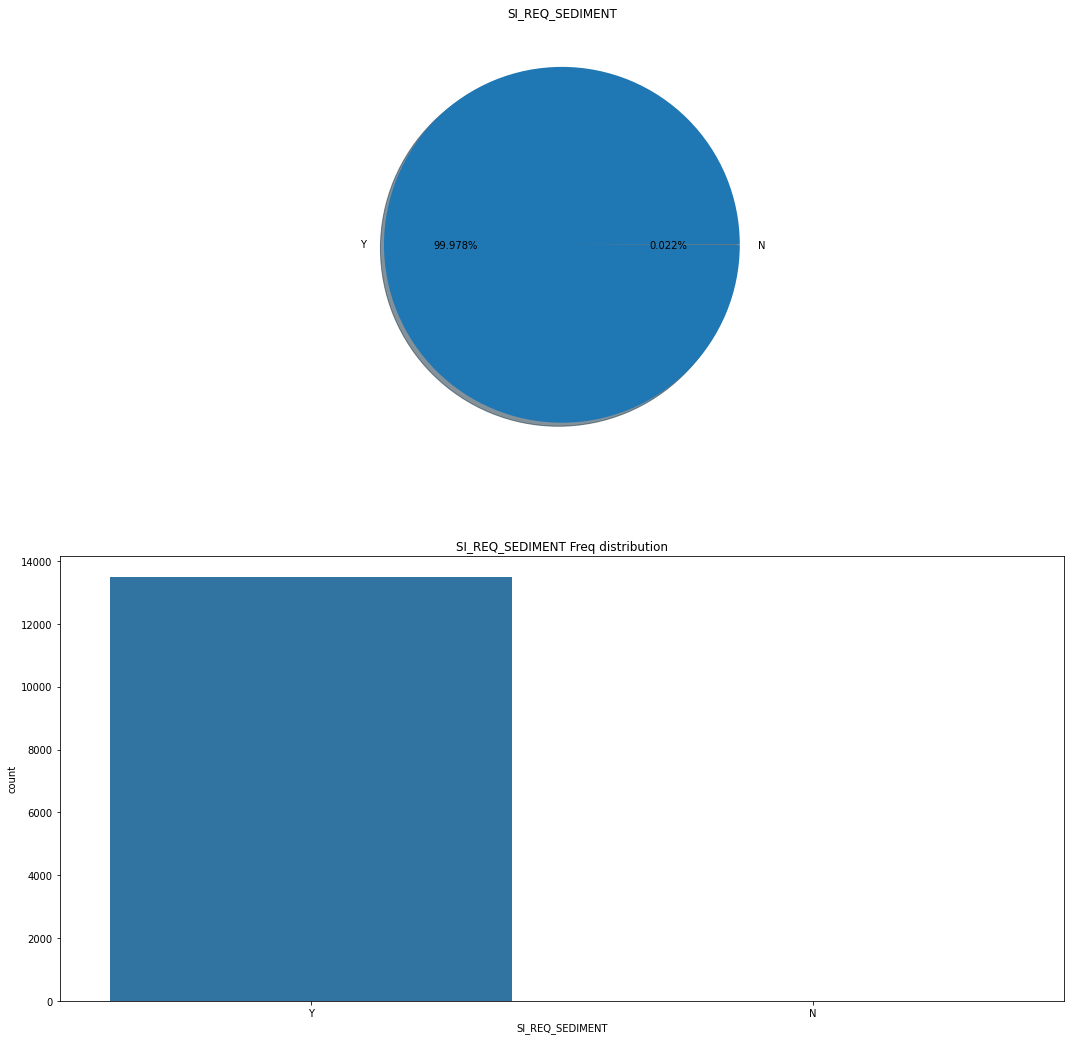

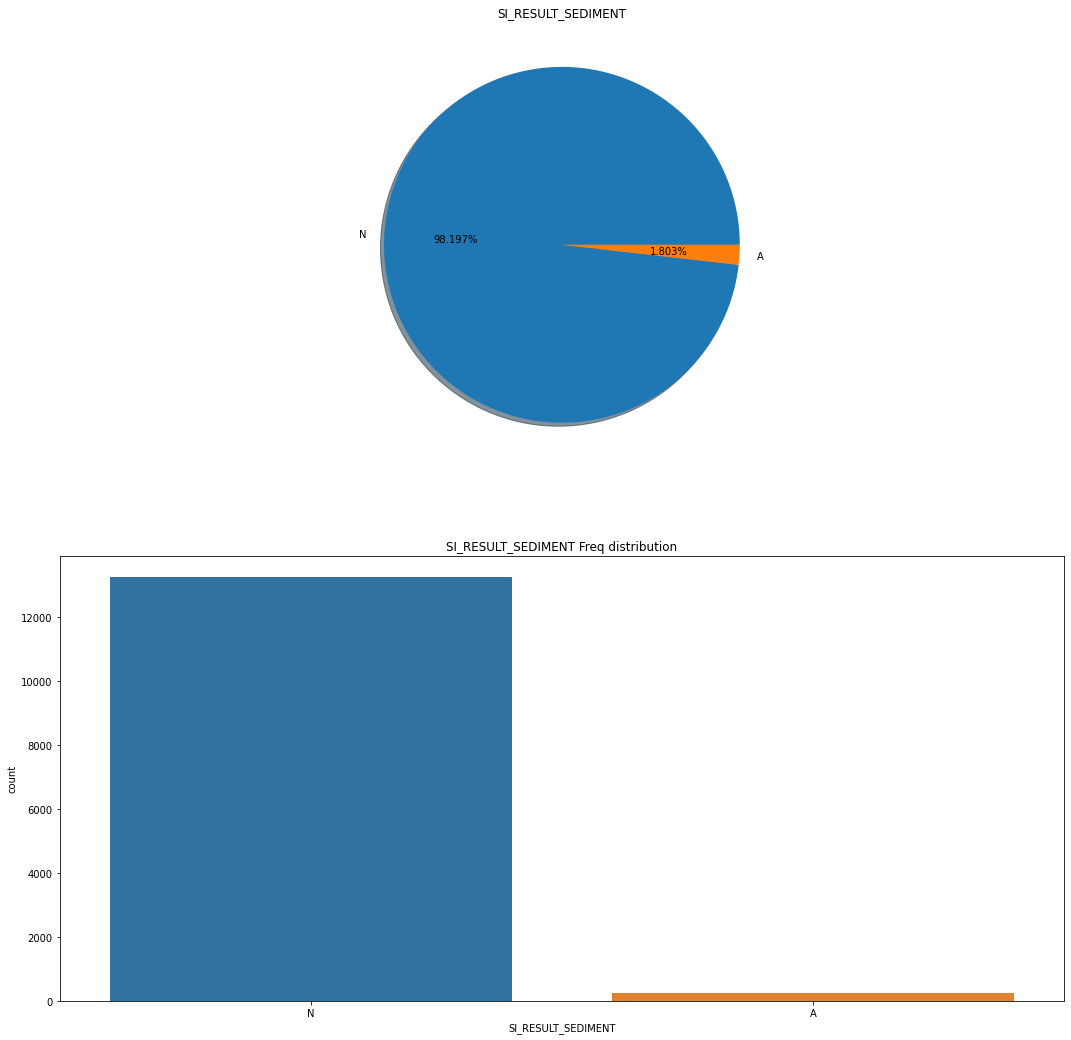

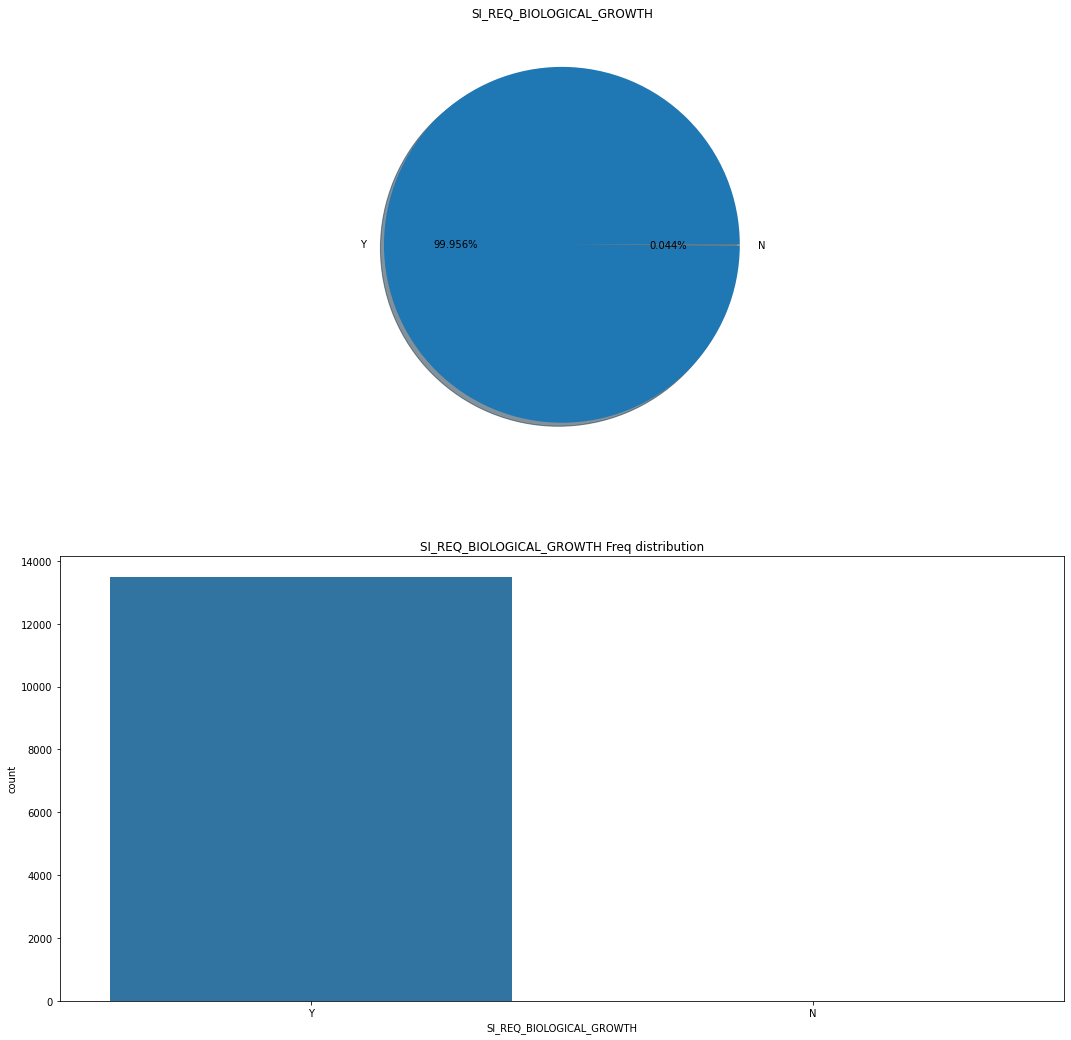

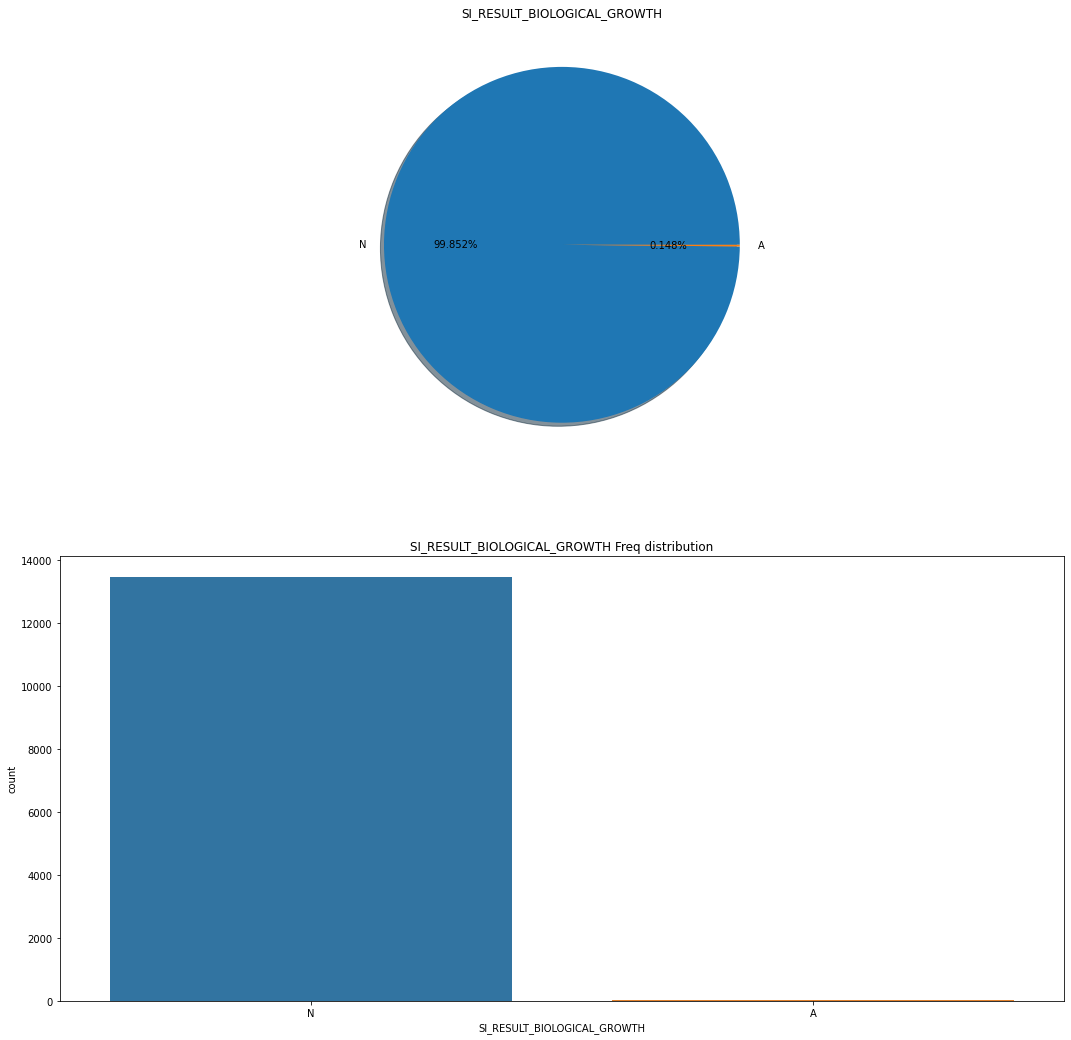

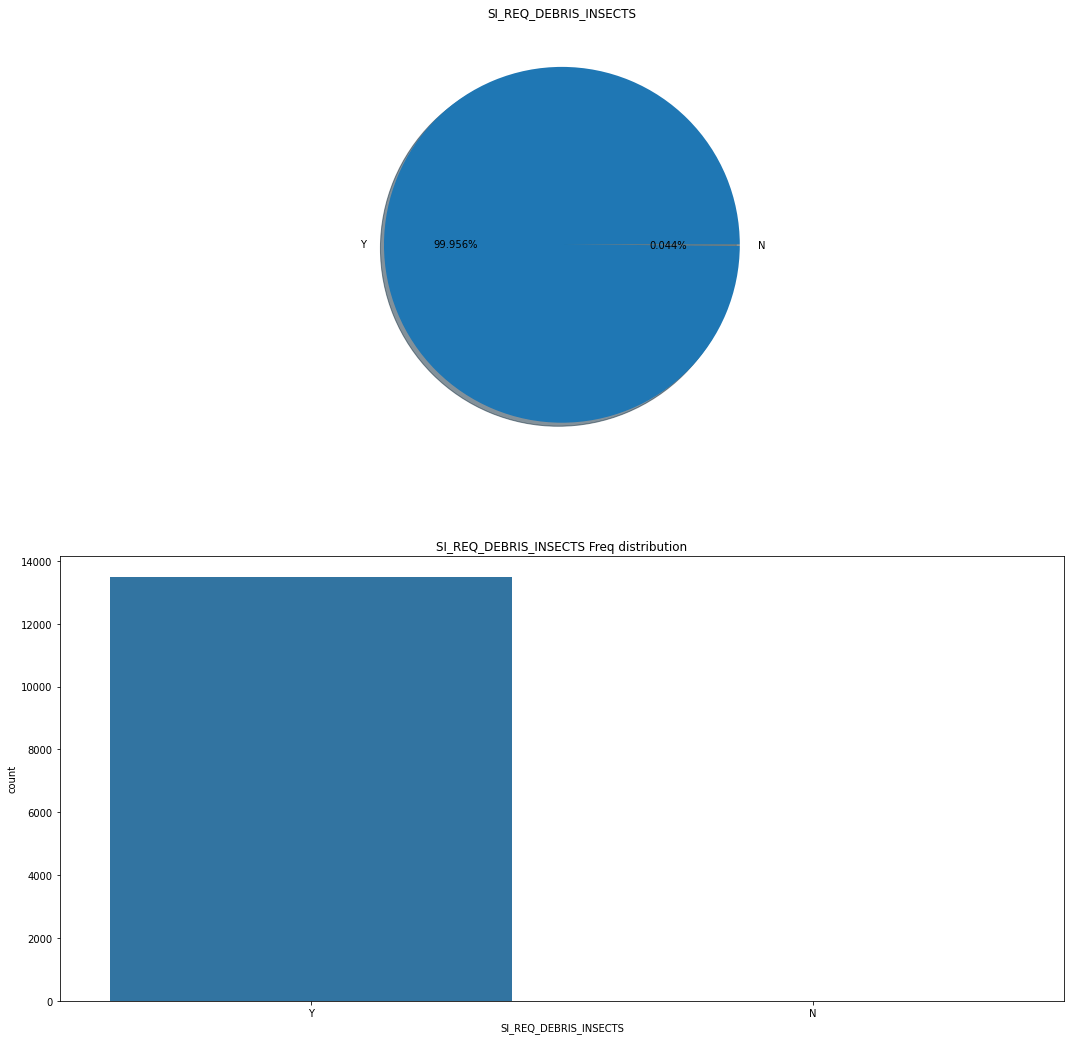

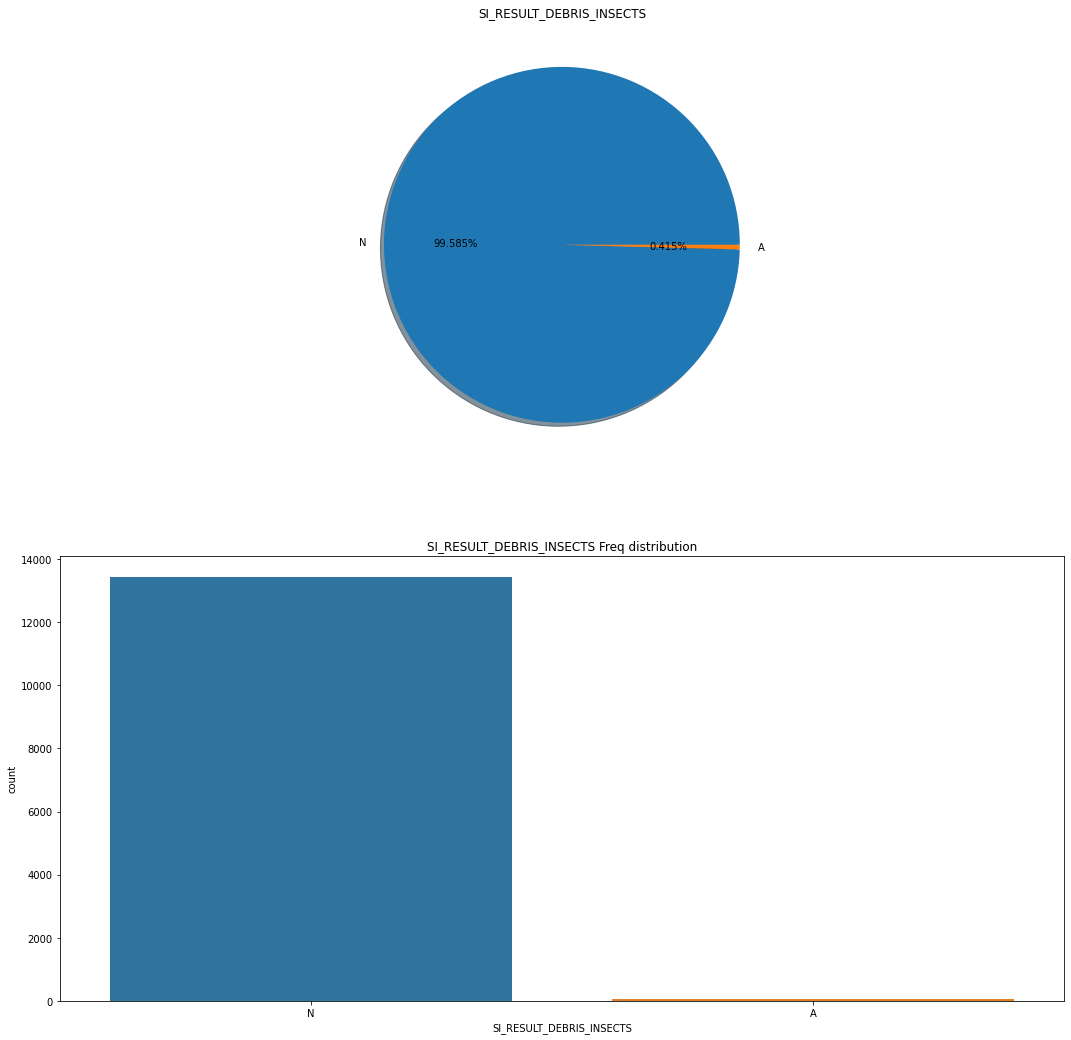

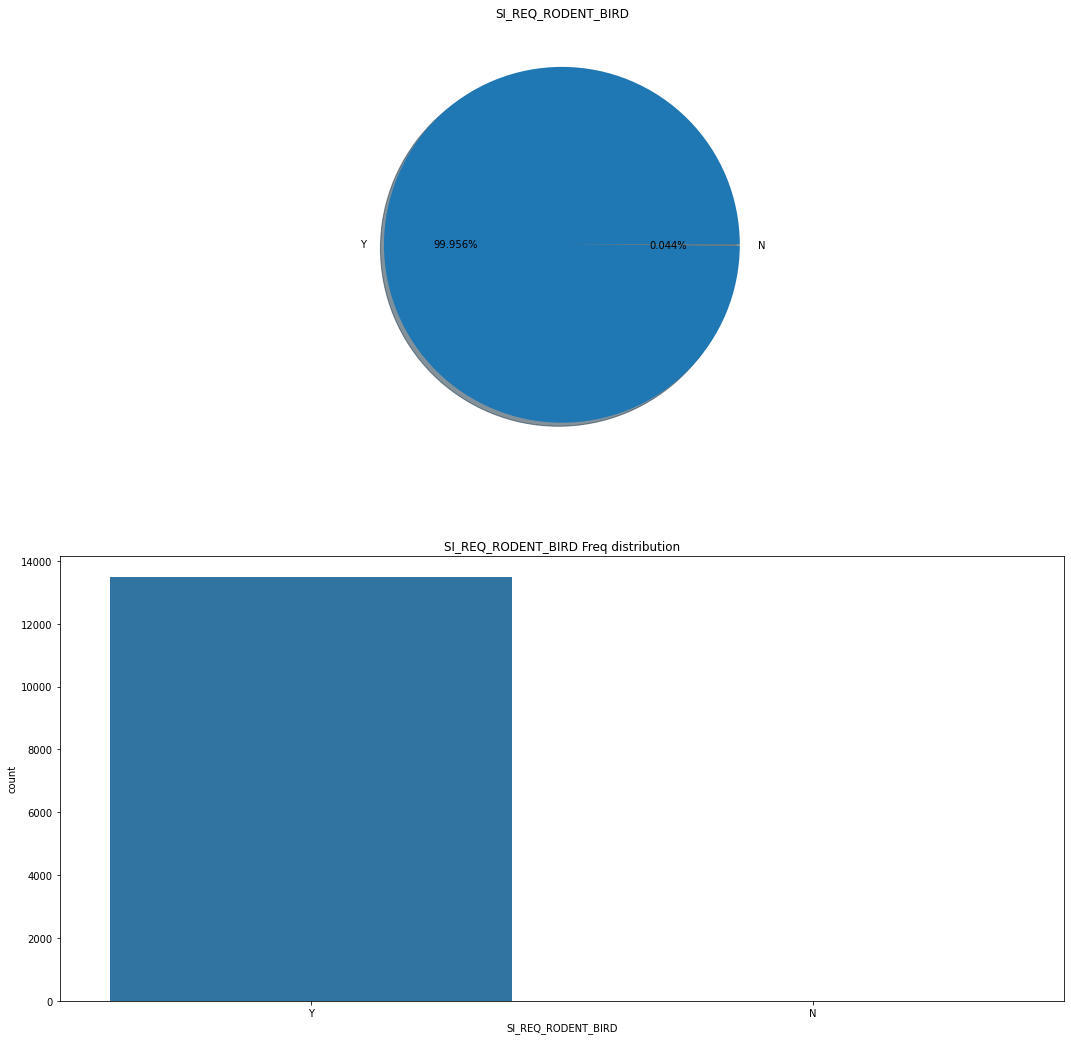

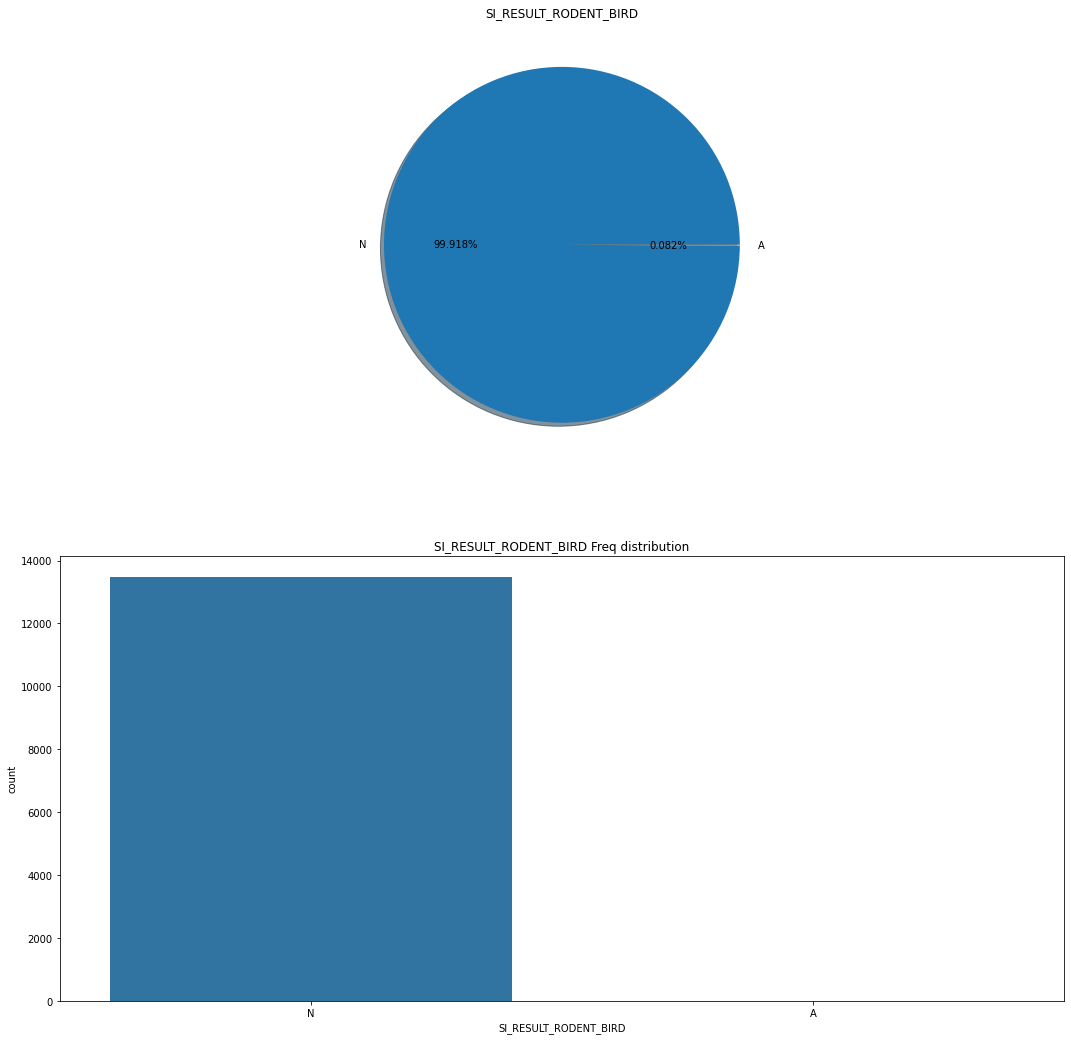

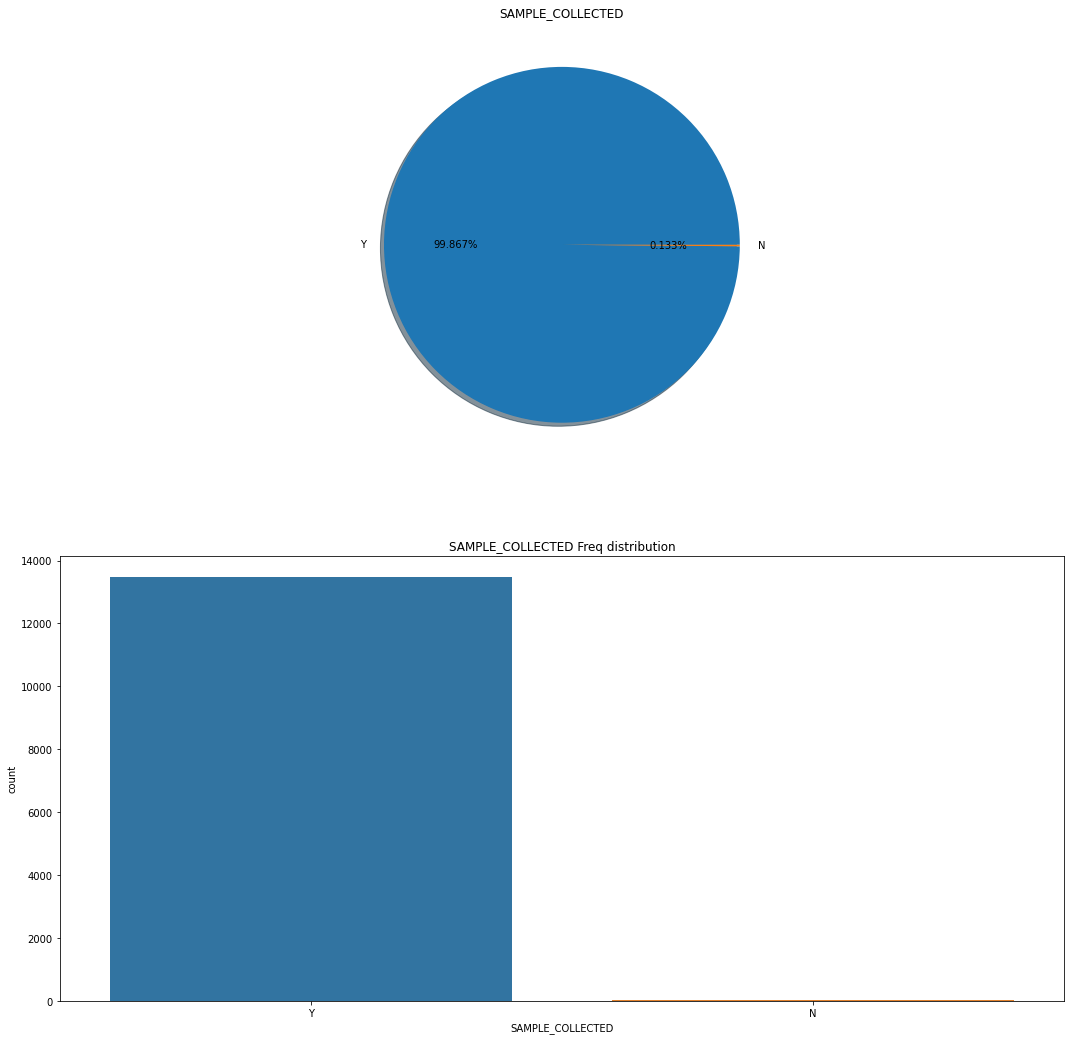

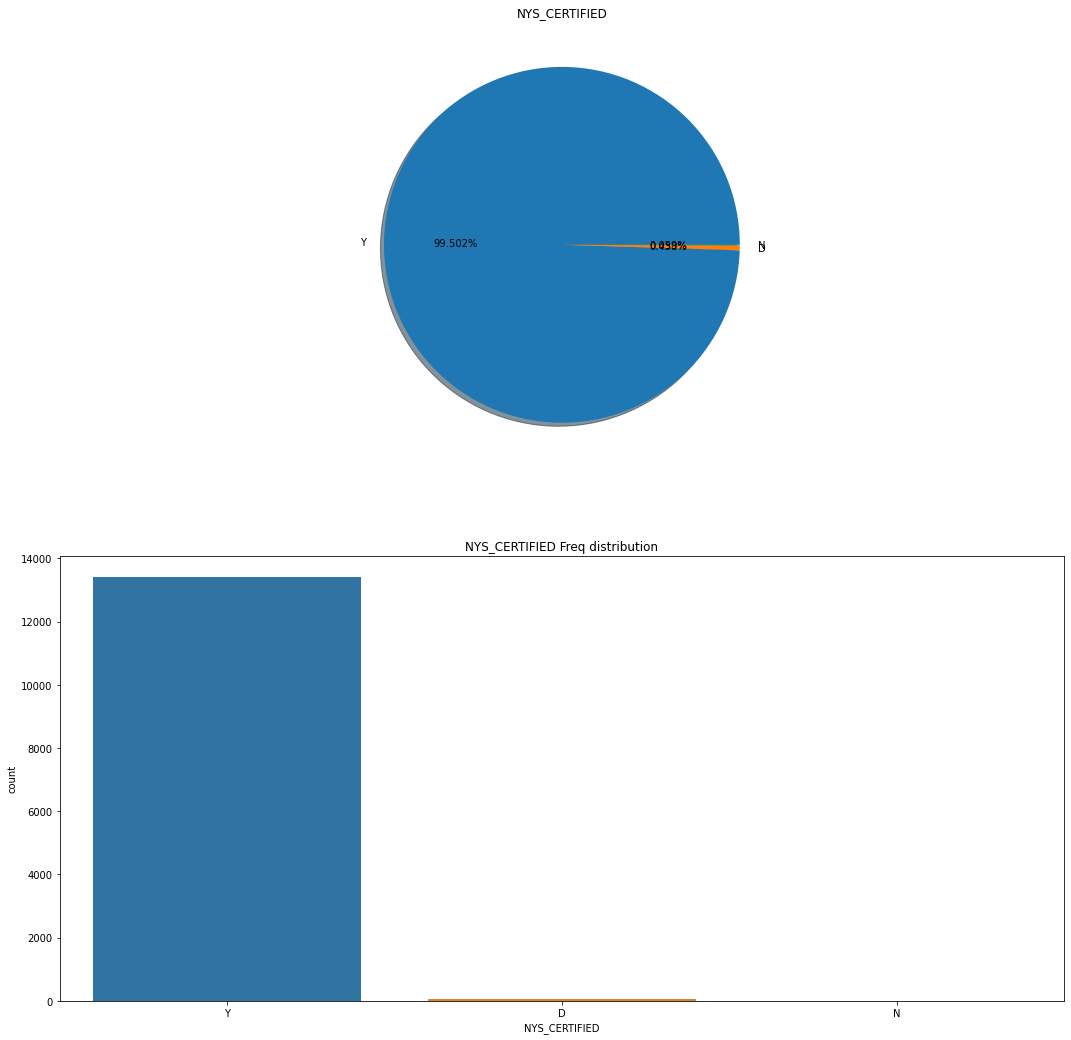

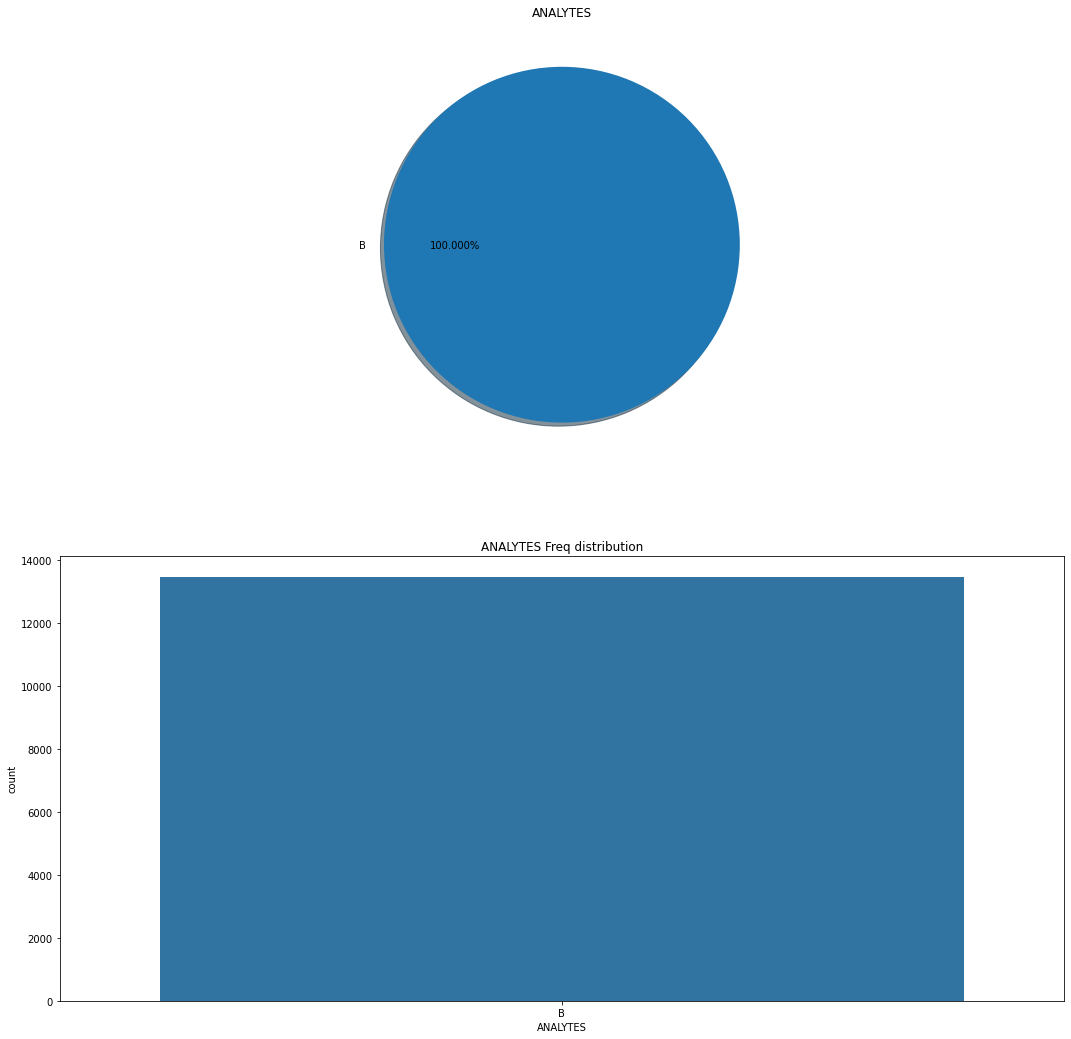

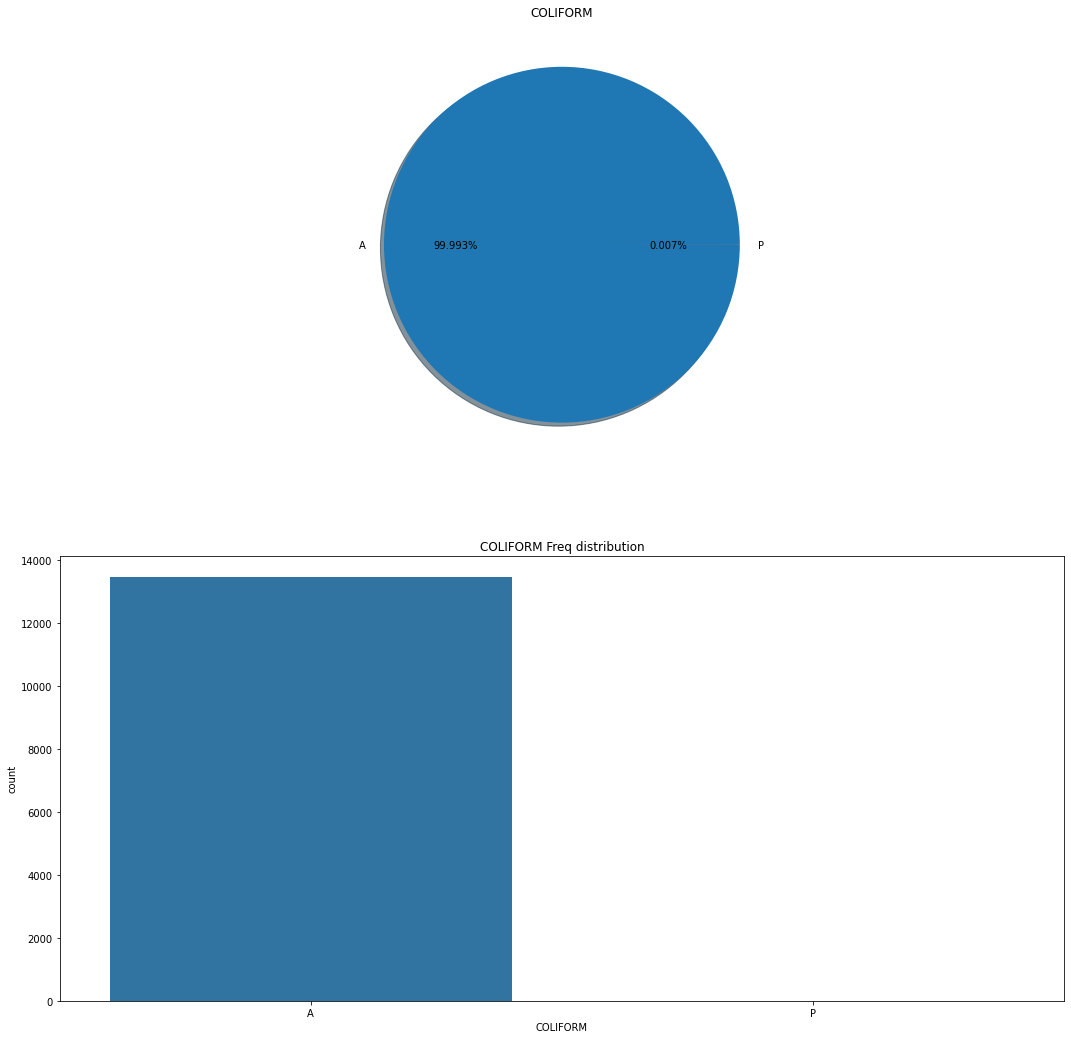

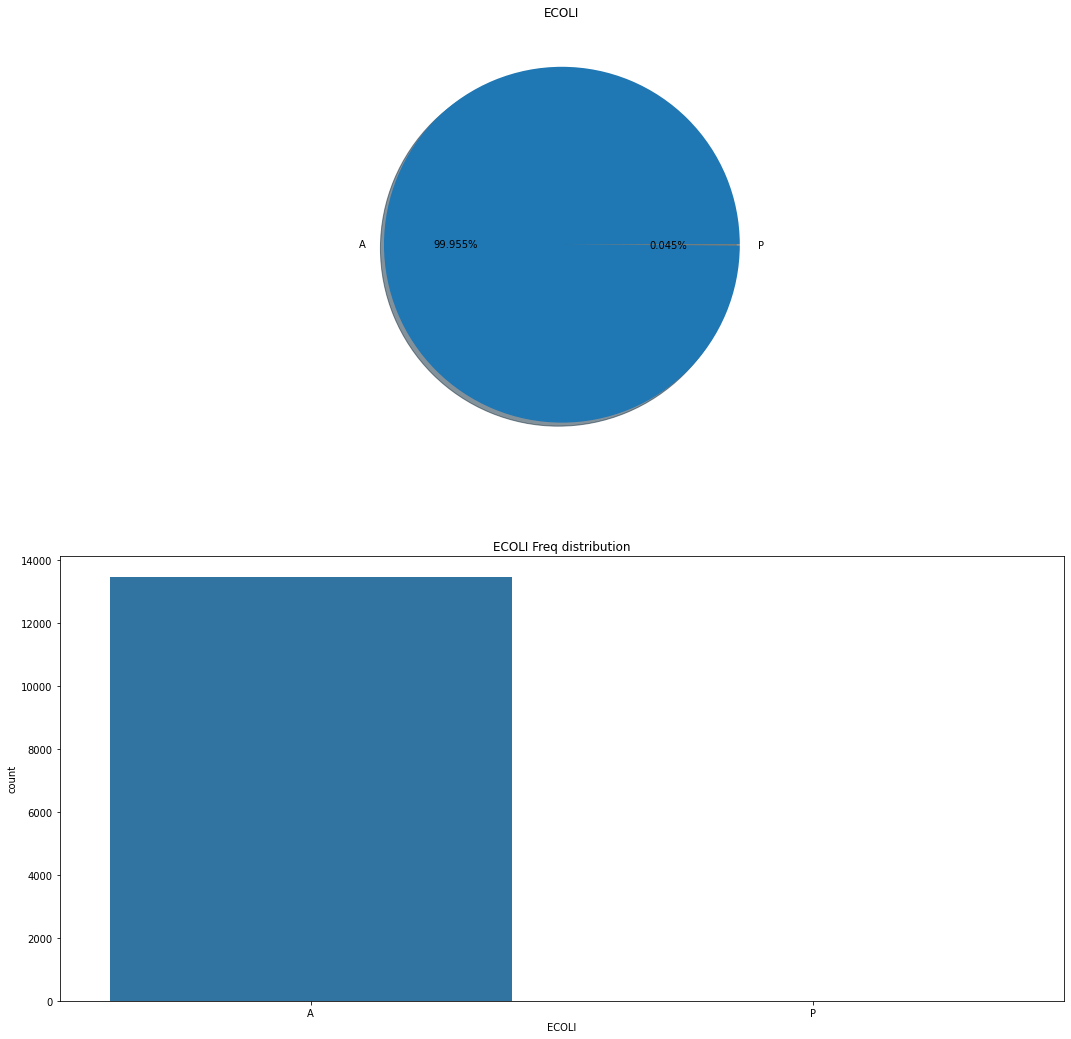

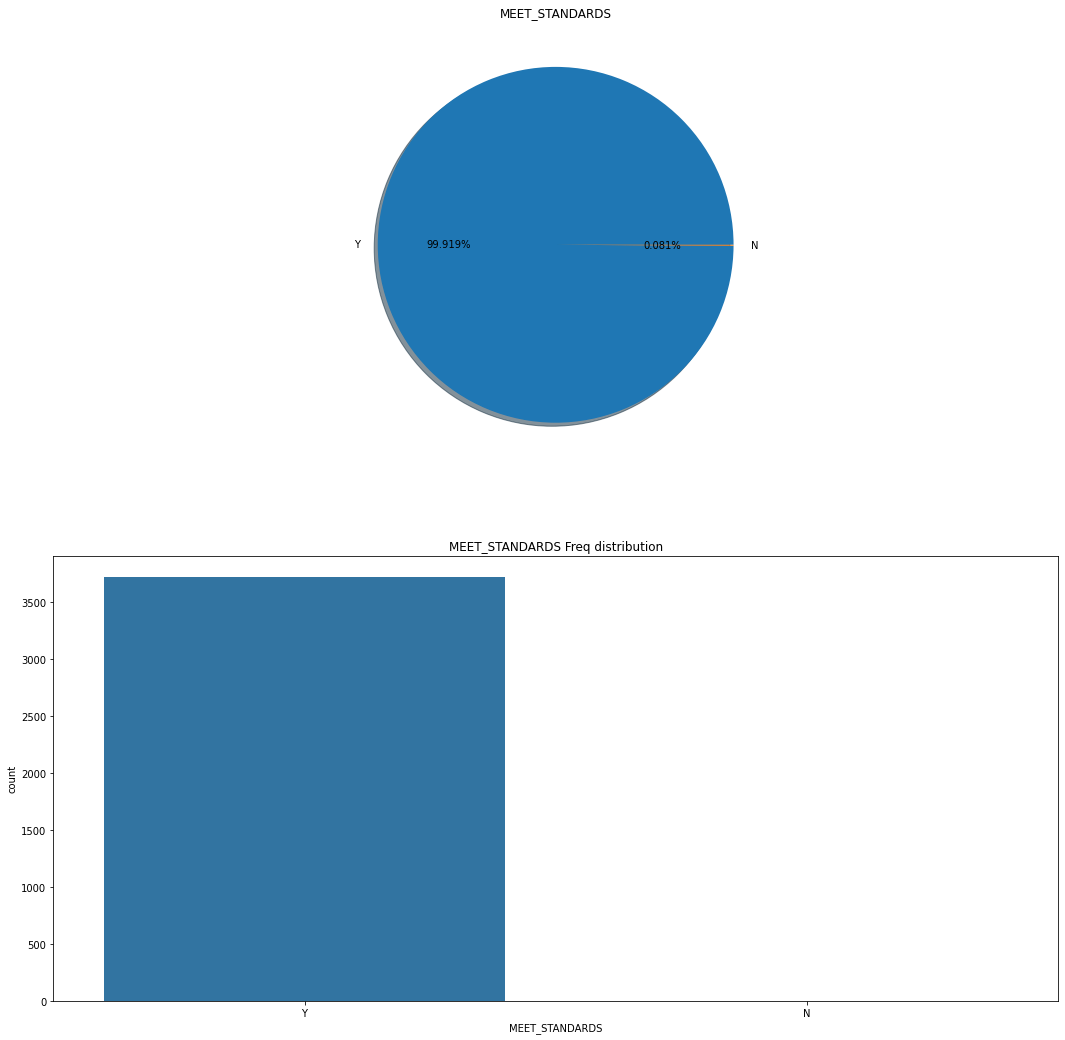

In [26]:
for c in cols:
    f, ax = plt.subplots(2,1, figsize=(18, 18))
    data[c].value_counts().plot.pie( autopct = '%1.3f%%',
                                            ax=ax[0], shadow=True)
    ax[0].set_title(c)
    ax[0].set_ylabel('')
    sns.countplot(c, data=data, ax=ax[1])
    ax[1].set_title(c+' Freq distribution')
    plt.show()
 

- Above are graphs which has mainly Yes or No values. 
- So beause number of columns are more I iterated through them 
- Freq distribution with pie chart is helpful to learn the categorical variables

In [28]:
data.head()

,BIN,BOROUGH,ZIP,HOUSE_NUM,STREET_NAME,BLOCK,LOT,CONFIRMATION_NUM,REPORTING_YEAR,TANK_NUM,INSPECTION_BY_FIRM,INSPECTION_PERFORMED,INSPECTION_DATE,GI_REQ_INTERNAL_STRUCTURE,GI_RESULT_INTERNAL_STRUCTURE,GI_REQ_EXTERNAL_STRUCTURE,GI_RESULT_EXTERNAL_STRUCTURE,GI_REQ_OVERFLOW_PIPES,GI_RESULT_OVERFLOW_PIPES,GI_REQ_ACCESS_LADDERS,GI_RESULT_ACCESS_LADDERS,GI_REQ_AIR_VENTS,GI_RESULT_AIR_VENTS,GI_REQ_ROOF_ACCESS,GI_RESULT_ROOF_ACCESS,SI_REQ_SEDIMENT,SI_RESULT_SEDIMENT,SI_REQ_BIOLOGICAL_GROWTH,SI_RESULT_BIOLOGICAL_GROWTH,SI_REQ_DEBRIS_INSECTS,SI_RESULT_DEBRIS_INSECTS,SI_REQ_RODENT_BIRD,SI_RESULT_RODENT_BIRD,SAMPLE_COLLECTED,LAB_NAME,NYS_CERTIFIED,ANALYTES,COLIFORM,ECOLI,MEET_STANDARDS,LATITUDE,LONGITUDE,COMMUNITY_BOARD,COUNCIL_DISTRICT,CENSUS_TRACT,BBL,NTA,BATCH_DATE,INSPECTION_BY_FIRM1,LAB_NAME1
0,1034025,MANHATTAN,10024,320,WEST 89 STREET,1250,47,WTI9835953296,2015,1,ISSEKS BROS INC,Y,12/10/2015,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,ENVIRONMENTAL BUILDING SOLUTIONS LLC,Y,B,A,A,NaN,40.791082,-73.977107,7.0,6.0,175.0,1.012500e+09,Upper West Side,05/11/2018 12:15:22 PM,ISSEKS BROS INC,"Environmental Building Solutions, LLC"
1,1087485,MANHATTAN,10038,8,Spruce St.,100,7502,WTI5946705268,2015,2,Isseks Bros Inc,Y,06/24/2015,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,Environmental Building Solutions,Y,B,A,A,NaN,40.711407,-74.005573,1.0,1.0,1501.0,1.001008e+09,Battery Park City-Lower Manhattan,05/11/2018 12:15:29 PM,ISSEKS BROS INC,"Environmental Building Solutions, LLC"
2,1082711,MANHATTAN,10011,455,WEST 23 STREET,721,7,WTI8886837394,2017,1,ISSEKS BROS INC,Y,11/02/2017,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,ENVIRONMENTAL BUILDING SOLUTIONS LLC,Y,B,A,A,NaN,40.747141,-74.002840,4.0,3.0,93.0,1.007210e+09,Hudson Yards-Chelsea-Flatiron-Union Square,05/11/2018 12:15:29 PM,ISSEKS BROS INC,"Environmental Building Solutions, LLC"
3,1038647,MANHATTAN,10017,5,Tudor City Place,1333,23,WTI5707518714,2016,1,Isseks Bros. Inc.,Y,12/17/2016,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,Environmental Building Solutions LLC,Y,B,A,A,NaN,40.748054,-73.971185,6.0,4.0,88.0,1.013330e+09,Turtle Bay-East Midtown,05/11/2018 12:15:23 PM,ISSEKS BROS INC,"Environmental Building Solutions, LLC"
4,1088817,MANHATTAN,10022,432,Park Ave,1292,7502,WTI0290447370,2017,1,New York Plumbing,Y,12/08/2017,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,N,Y,Ambient Group,Y,B,A,A,NaN,40.761042,-73.971176,5.0,4.0,11202.0,1.012928e+09,Midtown-Midtown South,05/11/2018 12:15:27 PM,others,others


In [41]:
num_col = ["HOUSE_NUM","TANK_NUM", "COMMUNITY_BOARD", "COUNCIL_DISTRICT", "CENSUS_TRACT"]

for i in num_col: 
    print('Column is ',i)
    print(data[i].value_counts(),'\n')

Column is  HOUSE_NUM
1          210
200        189
300        141
10         132
150        122
          ... 
903-907      1
16625        1
53-55        1
1730-40      1
53west       1
Name: HOUSE_NUM, Length: 1326, dtype: int64 

Column is  TANK_NUM
1     11334
2      1441
3       361
4       177
5        64
6        39
7        25
8        19
9        11
10        7
13        2
12        2
11        2
Name: TANK_NUM, dtype: int64 

Column is  COMMUNITY_BOARD
5.0     3203
8.0     2400
7.0     1706
6.0     1679
1.0     1072
2.0     1028
4.0      844
9.0      371
3.0      302
12.0     227
11.0     222
10.0     146
13.0     100
16.0      56
14.0      48
15.0      10
17.0       7
81.0       2
18.0       2
Name: COMMUNITY_BOARD, dtype: int64 

Column is  COUNCIL_DISTRICT
4.0     4167
3.0     1921
6.0     1443
1.0     1284
2.0     1143
5.0      981
7.0      355
33.0     261
9.0      160
29.0     143
11.0     137
10.0     126
8.0      120
18.0     100
35.0      99
26.0      80
16.0      75


In [34]:
# Univariate Analysis on Numerical Columns 

# HOUSE NUM : Number on street of water tank location

data['HOUSE_NUM'].dtype

dtype('O')

In [38]:
data.HOUSE_NUM.value_counts().index.unique()

Index(['1', '200', '300', '10', '150', '40', '55', '2', '45', '50',
       ...
       '135-33', '636', '1750', '26-30', '542', '903-907', '16625', '53-55',
       '1730-40', '53west'],
      dtype='object', length=1326)

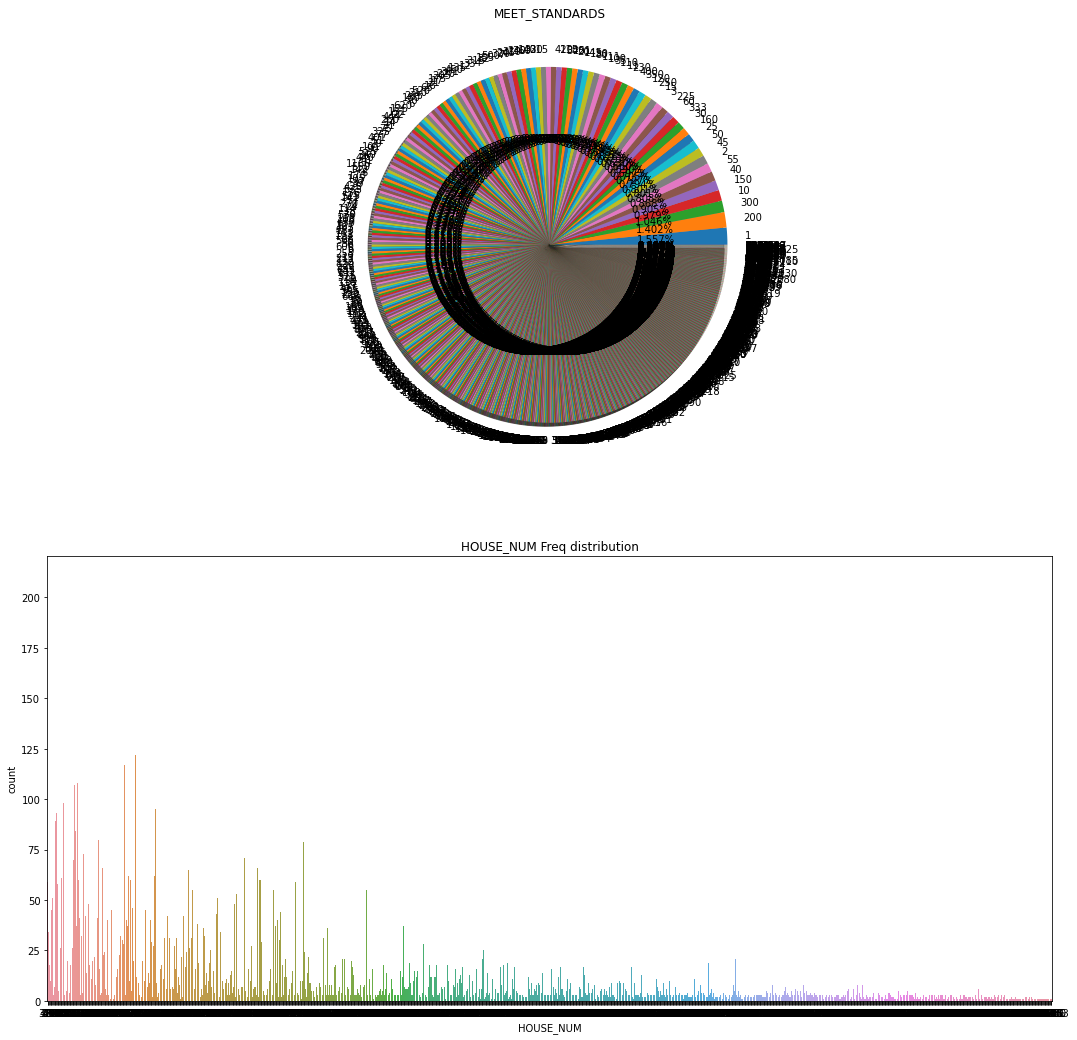

In [39]:
# So after checking the values of the HOUSE_NUM column we can see that the columns is not Numerical but the Categorical 
f, ax = plt.subplots(2,1, figsize=(18, 18))
data['HOUSE_NUM'].value_counts().plot.pie( autopct = '%1.3f%%',
                                        ax=ax[0], shadow=True)
ax[0].set_title(c)
ax[0].set_ylabel('')
sns.countplot('HOUSE_NUM', data=data, ax=ax[1])
ax[1].set_title("HOUSE_NUM"+' Freq distribution')
plt.show()

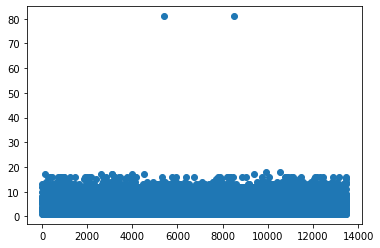

In [51]:
plt.scatter(data.index, data.COMMUNITY_BOARD)